In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import math
import numpy as np

In [2]:
ted_data = pd.read_csv('tedcleanedcsv.csv')

In [3]:
ted_data = ted_data.drop(columns = 'Unnamed: 0')

In [4]:
list(ted_data.columns)

['EDUC',
 'REASON',
 'AGE',
 'ALCFLG',
 'COKEFLG',
 'MARFLG',
 'HERFLG',
 'METHFLG',
 'OPSYNFLG',
 'PCPFLG',
 'HALLFLG',
 'MTHAMFLG',
 'AMPHFLG',
 'STIMFLG',
 'BENZFLG',
 'TRNQFLG',
 'BARBFLG',
 'SEDHPFLG',
 'INHFLG',
 'OTCFLG',
 'OTHERFLG',
 'SERVICES_Ambulatory, detoxification',
 'SERVICES_Ambulatory, intensive outpatient',
 'SERVICES_Ambulatory, non-intensive outpatient',
 'SERVICES_Detox, 24 hour, free-standing residential',
 'SERVICES_Detox, 24 hour, hospital inpatient',
 'SERVICES_Rehab/residential, hospital (non-detox)',
 'SERVICES_Rehab/residential, long term (more than 30 days)',
 'SERVICES_Rehab/residential, short term (30 days or fewer)',
 'PSOURCE_Alcohol/drug use care provider',
 'PSOURCE_Court/criminal justice referral/DUI/DWI',
 'PSOURCE_Employer/EAP',
 'PSOURCE_Individual (includes self-referral)',
 'PSOURCE_Other community referral',
 'PSOURCE_Other health care provider',
 'PSOURCE_School (educational)',
 'NOPRIOR_No prior treatment episodes',
 'EMPLOY_Full-time',
 'EM

In [5]:
ted_data = ted_data.drop(columns=['SERVICES_Ambulatory, detoxification','PSOURCE_Alcohol/drug use care provider','EMPLOY_Not in labor force','PSYPROB_No','GENDER_Female','VET_No','EMPLOY_D_Not in labor force','LIVARAG_D_Dependent living','DSMCRIT_Alcohol abuse','RACE_Alaskan Native','ETHNIC_Cuban or other specific Hispanic','SUB1_Inhalants','SUB2_Inhalants','FREQ1_No use in past month','FREQ2_No use in past month','IDU_IDU not reported','ALCDRUG_Alcohol and other drugs'])

In [6]:
corr = ted_data.corr()

In [7]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [8]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [9]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(ted_data, 25))

Top Absolute Correlations
ALCFLG                        ALCDRUG_Other drugs only                   0.999989
HERFLG                        SUB1_Heroin                                0.906892
TRNQFLG                       SUB2_Other tranquilizers                   0.857128
OTHERFLG                      SUB2_Other drugs                           0.800548
FREQ1_D_No use in past month  FREQ1_D_Some use                           0.792191
OPSYNFLG                      SUB1_Other opiates and synthetics          0.772064
ETHNIC_Mexican                ETHNIC_Not of Hispanic or Latino Origin    0.769714
BARBFLG                       SUB2_Barbiturates                          0.766444
SEDHPFLG                      SUB2_Other sedatives or hypnotics          0.753018
ALCFLG                        SUB1_Alcohol                               0.747580
SUB1_Alcohol                  ALCDRUG_Other drugs only                   0.747566
BENZFLG                       SUB2_Benzodiazepines                      

### Columns to drop
1. ALCDRUG_Other drugs only
2. SUB1_Heroin
3. SUB2_Other tranquilizers
4. SUB2_Other drugs
5. FREQ1_D_Some use
6. SUB1_Other opiates and synthetics
7. ETHNIC_Not of Hispanic orLatino Origin
8. SUB2_Barbiturates
9. SUB2_Other sedatives or hypnotics
10. SUB1_Alcohol
11. SUB2_Benzodiazepines
12. SUB1_Methamphetamines/speed
13. SUB1_PCP
14. SUB2_Cocaine/crack
15. SUB2_Over-the-counter-medications
16. SUB2_Other amphetamines
17. ALCDRUG_Alcohol only
18. SUB2_Other stimulants
19. SUB1_Other amphetamines
20. SUB2_Hallucinogens

In [10]:
ted_data = ted_data.drop(columns=['ALCDRUG_Other drugs only','SUB1_Heroin','SUB2_Other tranquilizers','SUB2_Other drugs','FREQ1_D_Some use','SUB1_Other opiates and synthetics','ETHNIC_Not of Hispanic or Latino Origin','SUB2_Barbiturates','SUB2_Other sedatives or hypnotics','SUB1_Alcohol','SUB2_Benzodiazepines','SUB1_Methamphetamines/speed','SUB1_PCP','SUB2_Cocaine/crack','SUB2_Over-the-counter medications','SUB2_Other amphetamines','ALCDRUG_Alcohol only','SUB2_Other stimulants','SUB1_Other amphetamines','SUB2_Hallucinogens'])

In [11]:
ted_data

,EDUC,REASON,AGE,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,...,SUB2_Non-prescription methadone,SUB2_Other opiates and synthetics,SUB2_PCP,FREQ1_Daily use,FREQ1_Some use,FREQ2_Daily use,FREQ2_Some use,FREQ1_D_Daily use,FREQ1_D_No use in past month,IDU_No substance reported
0,12,0,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,12,1,47,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,12,0,47,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
3,16,1,37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,12,1,65,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391426,12,0,32,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
391427,12,0,27,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
391428,16,1,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
391429,12,0,22,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [12]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(ted_data, 25))

Top Absolute Correlations
METHFLG                                             SUB2_Non-prescription methadone                       0.684027
                                                    SUB1_Non-prescription methadone                       0.672787
EMPLOY_Full-time                                    EMPLOY_D_Full-time                                    0.666028
EMPLOY_Unemployed                                   EMPLOY_D_Unemployed                                   0.644023
PSOURCE_Court/criminal justice referral/DUI/DWI     PSOURCE_Individual (includes self-referral)           0.600808
PCPFLG                                              SUB2_PCP                                              0.598697
HERFLG                                              IDU_No substance reported                             0.589120
RACE_Other single race                              RACE_White                                            0.583226
LIVARAG_D_Homeless                                  LI

In [13]:
ted_data = ted_data.loc[:,~ted_data.columns.str.startswith('SUB')]

In [14]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(ted_data, 25))

Top Absolute Correlations
EMPLOY_Full-time                                    EMPLOY_D_Full-time                                           0.666028
EMPLOY_Unemployed                                   EMPLOY_D_Unemployed                                          0.644023
PSOURCE_Court/criminal justice referral/DUI/DWI     PSOURCE_Individual (includes self-referral)                  0.600808
HERFLG                                              IDU_No substance reported                                    0.589120
RACE_Other single race                              RACE_White                                                   0.583226
LIVARAG_D_Homeless                                  LIVARAG_D_Independent living                                 0.582010
EMPLOY_Part-time                                    EMPLOY_D_Part-time                                           0.577490
FREQ1_Daily use                                     FREQ1_Some use                                               0.56991

In [15]:
ted_data

,EDUC,REASON,AGE,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,...,"ETHNIC_Hispanic or Latino, specific origin not specified",ETHNIC_Mexican,ETHNIC_Puerto Rican,FREQ1_Daily use,FREQ1_Some use,FREQ2_Daily use,FREQ2_Some use,FREQ1_D_Daily use,FREQ1_D_No use in past month,IDU_No substance reported
0,12,0,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,12,1,47,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,12,0,47,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,16,1,37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,12,1,65,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391426,12,0,32,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
391427,12,0,27,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
391428,16,1,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
391429,12,0,22,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [16]:
for c in ted_data.columns:
    print("---- %s ---" % c)
    print(ted_data[c].value_counts())

---- EDUC ---
12    181483
10     95682
14     69854
16     23140
8      21272
Name: EDUC, dtype: int64
---- REASON ---
0    214612
1    176819
Name: REASON, dtype: int64
---- AGE ---
27    69603
32    64040
37    51334
22    36457
42    35156
47    34700
60    33559
52    31266
16    14720
19    13382
65     4530
13     2684
Name: AGE, dtype: int64
---- ALCFLG ---
0    228042
1    163389
Name: ALCFLG, dtype: int64
---- COKEFLG ---
0    351334
1     40097
Name: COKEFLG, dtype: int64
---- MARFLG ---
0    278029
1    113402
Name: MARFLG, dtype: int64
---- HERFLG ---
0    288565
1    102866
Name: HERFLG, dtype: int64
---- METHFLG ---
0    390251
1      1180
Name: METHFLG, dtype: int64
---- OPSYNFLG ---
0    362977
1     28454
Name: OPSYNFLG, dtype: int64
---- PCPFLG ---
0    389210
1      2221
Name: PCPFLG, dtype: int64
---- HALLFLG ---
0    389867
1      1564
Name: HALLFLG, dtype: int64
---- MTHAMFLG ---
0    248127
1    143304
Name: MTHAMFLG, dtype: int64
---- AMPHFLG ---
0    389485
1 

### Uninformative Variables

1. METHFLG
2. PCPFLG
3. HALLFLG
4. AMPHFLG
5. STIMFLG
6. TRNQFLG
7. BARBFLG
8. SEDHPFLG
9. INHFLG
10. OTCFLG
11. SERVICES_Rehab/residential, hospital (non-detox)
12. PSOURCE_Employer/EAP
13. METHUSE_No
14. DSMCRIT_Alcohol-induced disorder
15. DSMCRIT_Anxiety disorders
16. DSMCRIT_Attention deficit/disruptive behavior disorders
17. DSMCRIT_Bipolar disorders
18. DSMCRIT_Cocaine abuse
19. DSMCRIT_Depressive disorders
20. DSMCRIT_Opioid abuse
21. DSMCRIT_Other mental health condition
22. DSMCRIT_Schizophrenia/other psychotic disorders
23. RACE_Native Haiwaiian or Other Pacific Islander

In [17]:
ted_data = ted_data.drop(columns = ['METHFLG','PCPFLG','HALLFLG','AMPHFLG','STIMFLG','TRNQFLG','BARBFLG','SEDHPFLG','INHFLG','OTCFLG','SERVICES_Rehab/residential, hospital (non-detox)','PSOURCE_Employer/EAP','METHUSE_No','DSMCRIT_Alcohol-induced disorder','DSMCRIT_Anxiety disorders','DSMCRIT_Attention deficit/disruptive behavior disorders','DSMCRIT_Bipolar disorders','DSMCRIT_Cocaine abuse','DSMCRIT_Depressive disorders','DSMCRIT_Opioid abuse','DSMCRIT_Other mental health condition','DSMCRIT_Schizophrenia/other psychotic disorders','RACE_Native Haiwaiian or Other Pacific Islander'])

In [18]:
ted_data

,EDUC,REASON,AGE,ALCFLG,COKEFLG,MARFLG,HERFLG,OPSYNFLG,MTHAMFLG,BENZFLG,...,"ETHNIC_Hispanic or Latino, specific origin not specified",ETHNIC_Mexican,ETHNIC_Puerto Rican,FREQ1_Daily use,FREQ1_Some use,FREQ2_Daily use,FREQ2_Some use,FREQ1_D_Daily use,FREQ1_D_No use in past month,IDU_No substance reported
0,12,0,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,12,1,47,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,12,0,47,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3,16,1,37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,12,1,65,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391426,12,0,32,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
391427,12,0,27,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
391428,16,1,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
391429,12,0,22,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


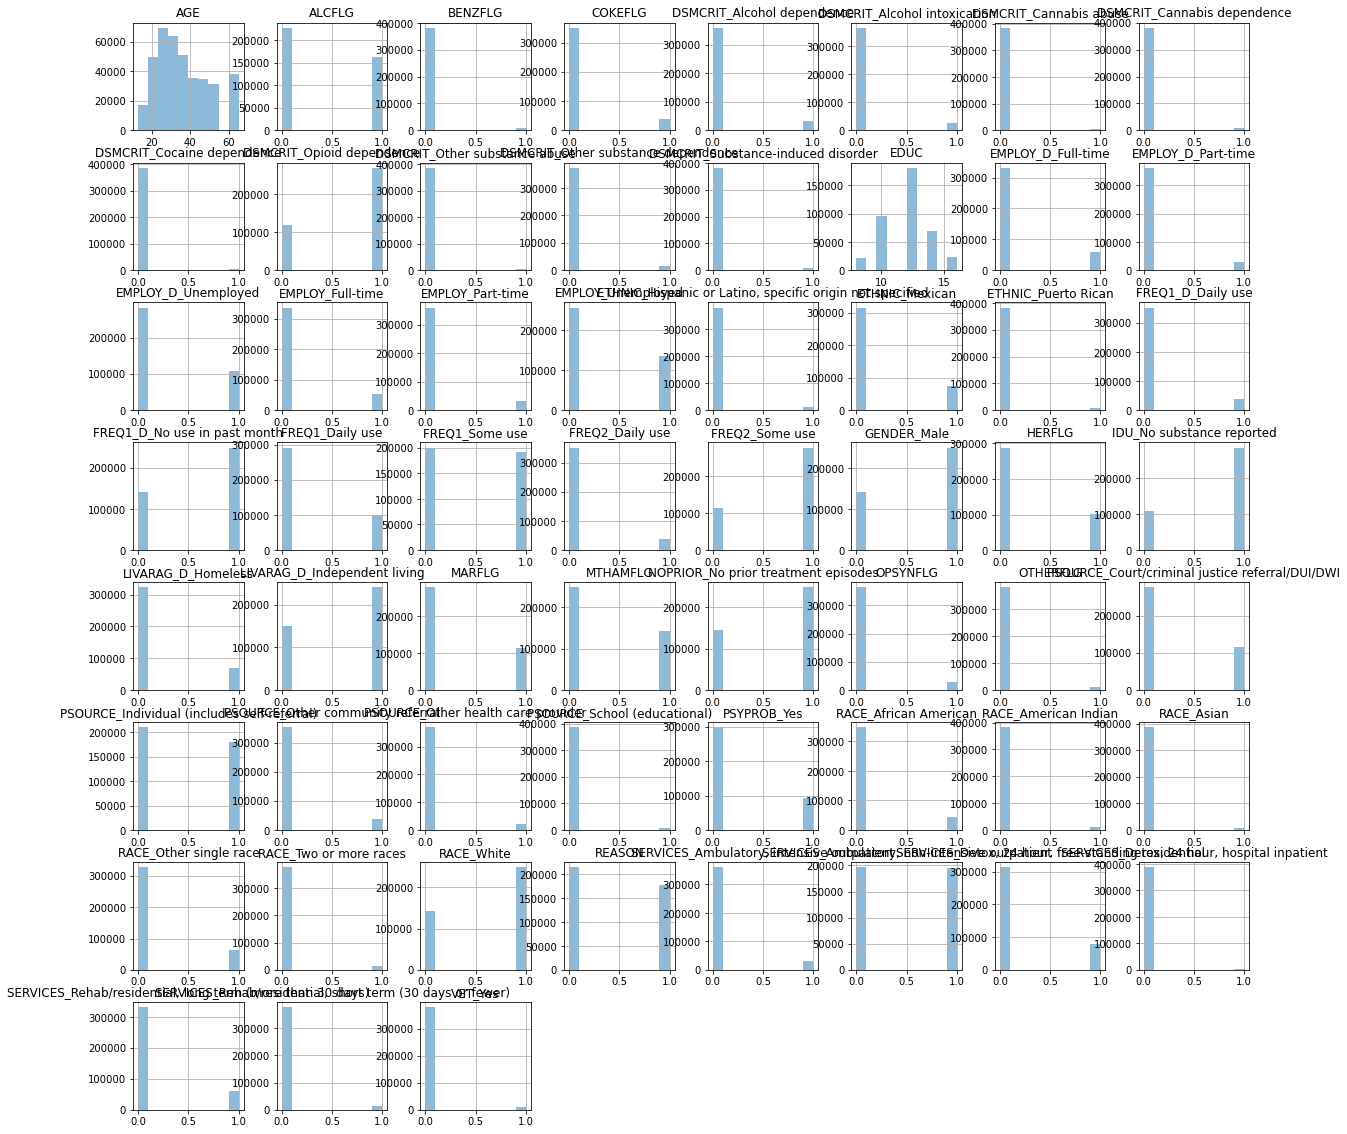

In [19]:
ted_data.hist(figsize=(20,20),alpha=.5)
plt.show()

REASON
0    [[AxesSubplot(0.125,0.805248;0.0767327x0.07475...
1    [[AxesSubplot(0.125,0.805248;0.0767327x0.07475...
dtype: object

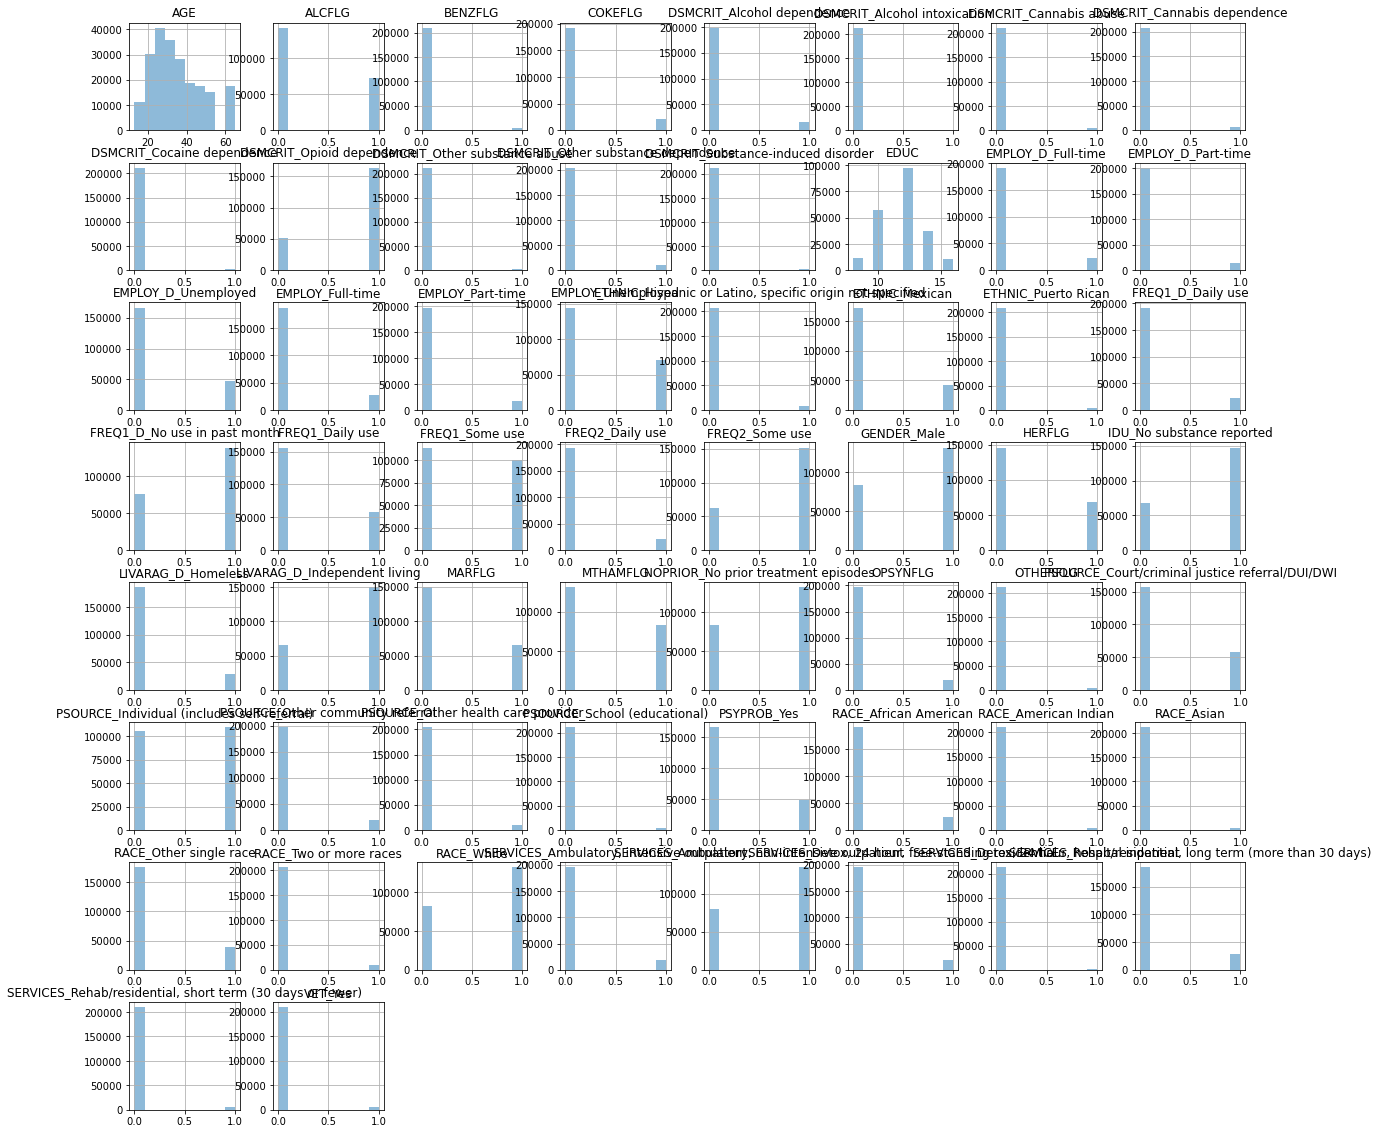

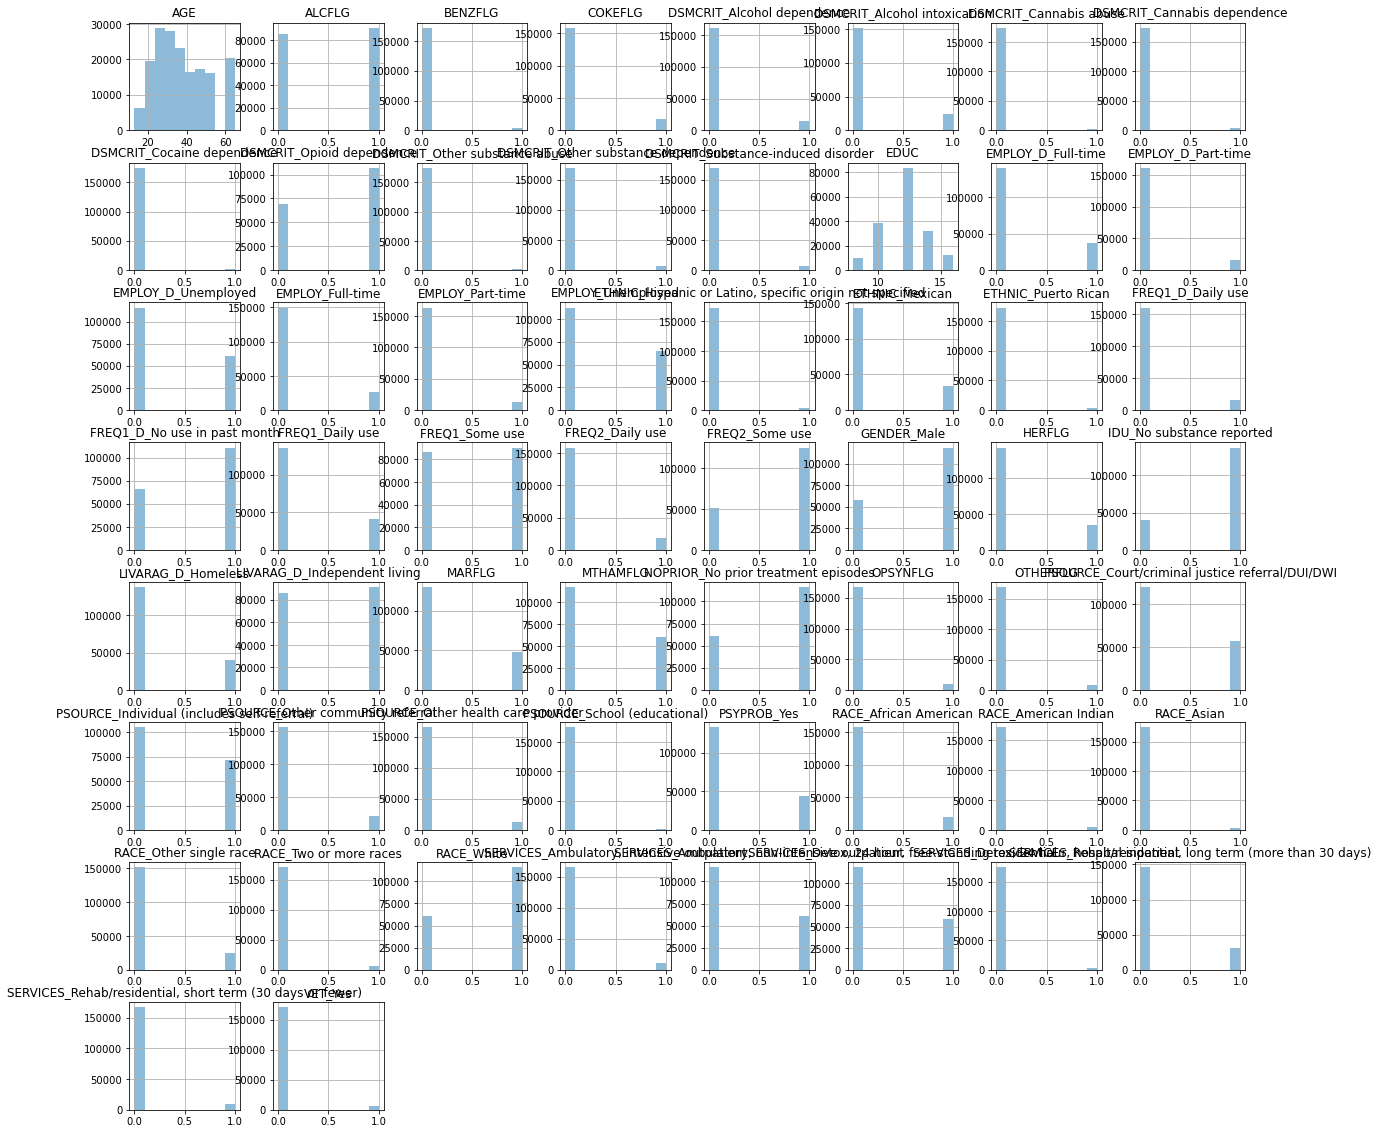

In [20]:
ted_data.groupby('REASON').hist(figsize=(20,20),alpha=.5)

In [21]:
y = ted_data['REASON']
X = ted_data.drop(columns='REASON')

In [22]:
X = sm.add_constant(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
model = sm.Logit(y_train,X_train)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.538359
         Iterations 7


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 REASON   No. Observations:               313144
Model:                          Logit   Df Residuals:                   313085
Method:                           MLE   Df Model:                           58
Date:                Tue, 09 Nov 2021   Pseudo R-squ.:                  0.2181
Time:                        22:43:53   Log-Likelihood:            -1.6858e+05
converged:                       True   LL-Null:                   -2.1561e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                        -0.2285      0.070     -3.262      0.001      -0.366      -0.091
EDUC                                                          0.0203      0.002      8.396      0.000       0.016       0.025
AGE                                                           0.0094      0.000     24.469      0.000       0.009       0.010
ALCFLG                                                        0.1508      0.012     12.742      0.000       0.128       0.174
COKEFLG                                                       0.0565      0.016      3.619      0.000       0.026       0.087
MARFLG                                                       -0.0279      0.012     -2.366      0.018      -0.051      -0.005
HERFLG                                                       -0.2711      0.016    -17.330      0.000      -0.302      -0.240
OPSYNFLG                                                     -0.2127      0.018    -11.652      0.000      -0.248      -0.177
MTHAMFLG                                                     -0.1726      0.012    -14.242      0.000      -0.196      -0.149
BENZFLG                                                       0.1115      0.028      3.968      0.000       0.056       0.167
OTHERFLG                                                      0.1273      0.032      3.966      0.000       0.064       0.190
SERVICES_Ambulatory, intensive outpatient                    -0.8297      0.032    -25.601      0.000      -0.893      -0.766
SERVICES_Ambulatory, non-intensive outpatient                -1.0320      0.030    -34.936      0.000      -1.090      -0.974
SERVICES_Detox, 24 hour, free-standing residential            0.8171      0.031     26.336      0.000       0.756       0.878
SERVICES_Detox, 24 hour, hospital inpatient                   0.8462      0.049     17.442      0.000       0.751       0.941
SERVICES_Rehab/residential, long term (more than 30 days)    -0.2014      0.031     -6.511      0.000      -0.262      -0.141
SERVICES_Rehab/residential, short term (30 days or fewer)     0.5674      0.036     15.799      0.000       0.497       0.638
PSOURCE_Court/criminal justice referral/DUI/DWI               0.2785      0.018     15.591      0.000       0.244       0.314
PSOURCE_Individual (includes self-referral)                  -0.2154      0.017    -12.711      0.000      -0.249      -0.182
PSOURCE_Other community referral                              0.0591      0.021      2.797      0.005       0.018       0.101
PSOURCE_Other health care provider                           -0.4775      0.025    -18.991      0.000      -0.527      -0.428
PSOURCE_School (educational)                                  0.3185      0.038      8.355      0.000       0.244       0.393
NOPRIOR_No prior treatment episodes                          -0.0318      0.009     -3.501 

### Nonsignificant Variables

1. PSYPROB_Yes
2. GENDER_Male
3. VET_Yes
4. DSMCRIT_Cannabis abuse
5. RACE_African American
6. RACE_Two or more races

In [26]:
results.params

const                                                       -0.228513
EDUC                                                         0.020266
AGE                                                          0.009431
ALCFLG                                                       0.150821
COKEFLG                                                      0.056477
MARFLG                                                      -0.027863
HERFLG                                                      -0.271123
OPSYNFLG                                                    -0.212659
MTHAMFLG                                                    -0.172576
BENZFLG                                                      0.111547
OTHERFLG                                                     0.127281
SERVICES_Ambulatory, intensive outpatient                   -0.829685
SERVICES_Ambulatory, non-intensive outpatient               -1.032014
SERVICES_Detox, 24 hour, free-standing residential           0.817081
SERVICES_Detox, 24 h

In [27]:
predictions = results.predict(X_test)

In [28]:
predictions_scored = [1 if x>.5 else 0 for x in predictions]

In [29]:
confusion_matrix_test = confusion_matrix(y_test, predictions_scored)
print(confusion_matrix_test)

[[34106  8905]
 [12942 22334]]


In [30]:
print(classification_report(y_test, predictions_scored, target_names=['Rehab_Completed','Rehab_NotCompleted']))

                    precision    recall  f1-score   support

   Rehab_Completed       0.72      0.79      0.76     43011
Rehab_NotCompleted       0.71      0.63      0.67     35276

          accuracy                           0.72     78287
         macro avg       0.72      0.71      0.71     78287
      weighted avg       0.72      0.72      0.72     78287



In [31]:
coefficients = pd.DataFrame(results.params).rename(columns={0:'Coefficient'})

In [32]:
coefficients = coefficients.drop(['PSYPROB_Yes','GENDER_Male','VET_Yes','DSMCRIT_Cannabis abuse','RACE_African American','RACE_Two or more races'])

In [33]:
coefficients['abs_val'] = coefficients['Coefficient'].abs()

In [34]:
coefficients = coefficients.sort_values(by=['abs_val'],ascending=False)

In [35]:
coefficients = coefficients.drop(columns=['abs_val'])

In [36]:
coefficients

,Coefficient
EMPLOY_D_Full-time,2.062665
DSMCRIT_Alcohol intoxication,2.009480
EMPLOY_D_Part-time,1.592075
EMPLOY_D_Unemployed,1.166210
DSMCRIT_Substance-induced disorder,1.090329
"SERVICES_Ambulatory, non-intensive outpatient",-1.032014
EMPLOY_Full-time,-0.960327
"SERVICES_Detox, 24 hour, hospital inpatient",0.846205
"SERVICES_Ambulatory, intensive outpatient",-0.829685
EMPLOY_Part-time,-0.819603


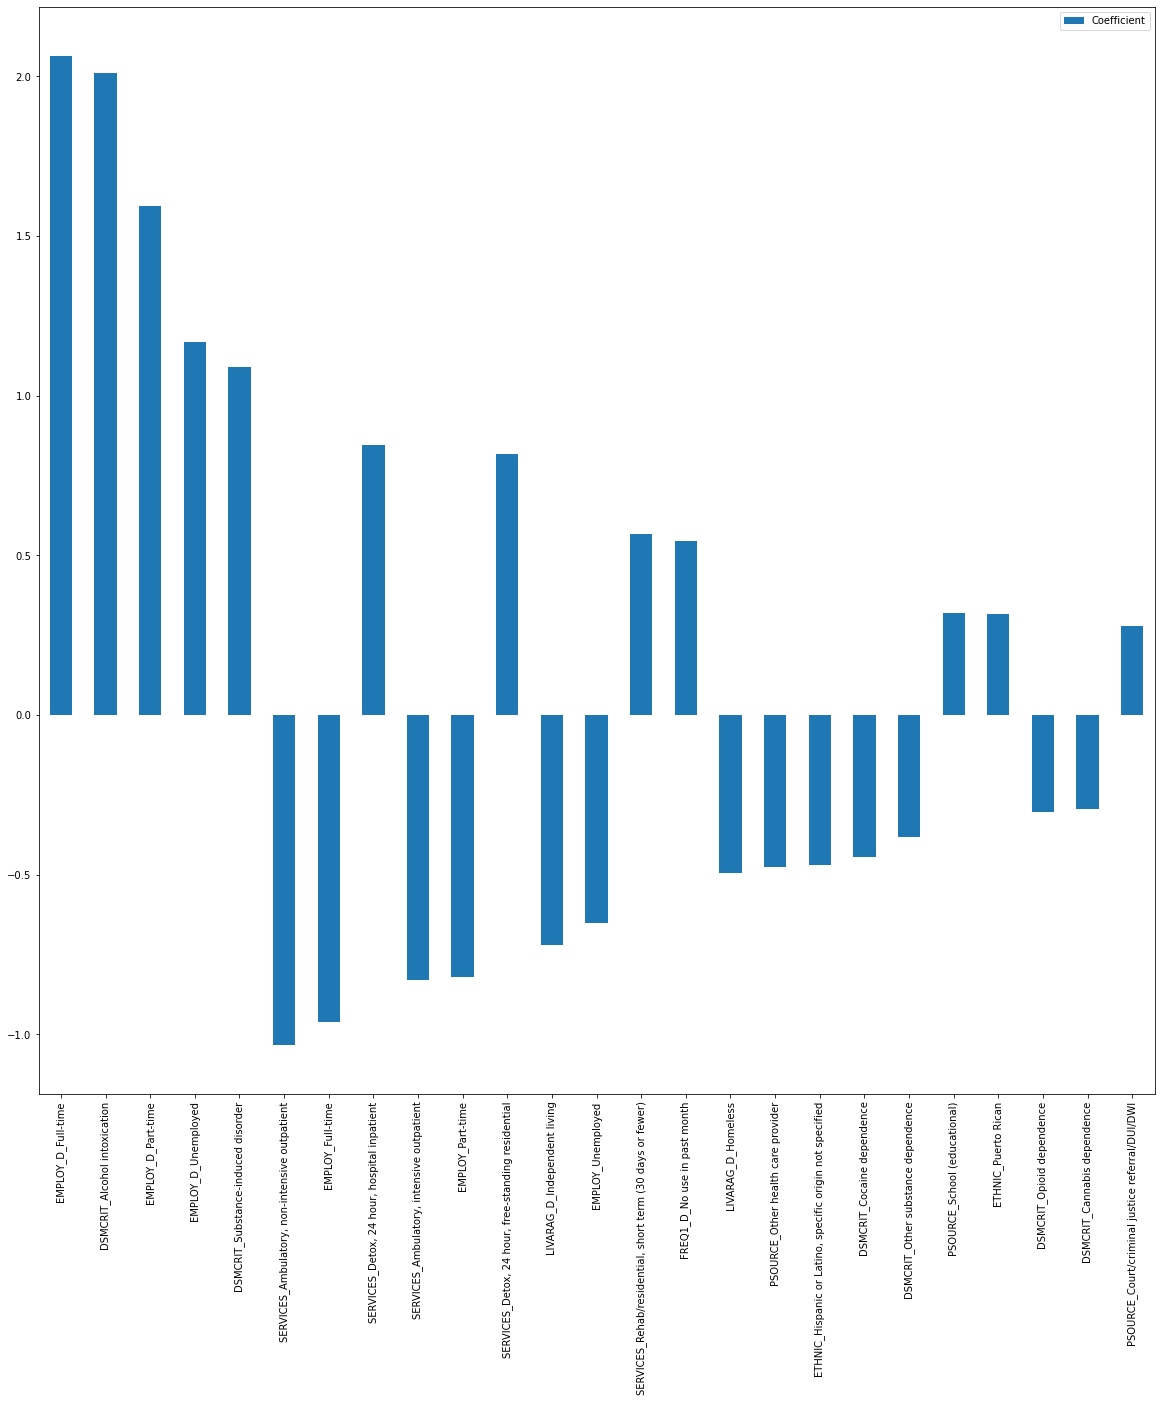

In [37]:
coefficients.head(25).plot(kind='bar',figsize=(20,20))

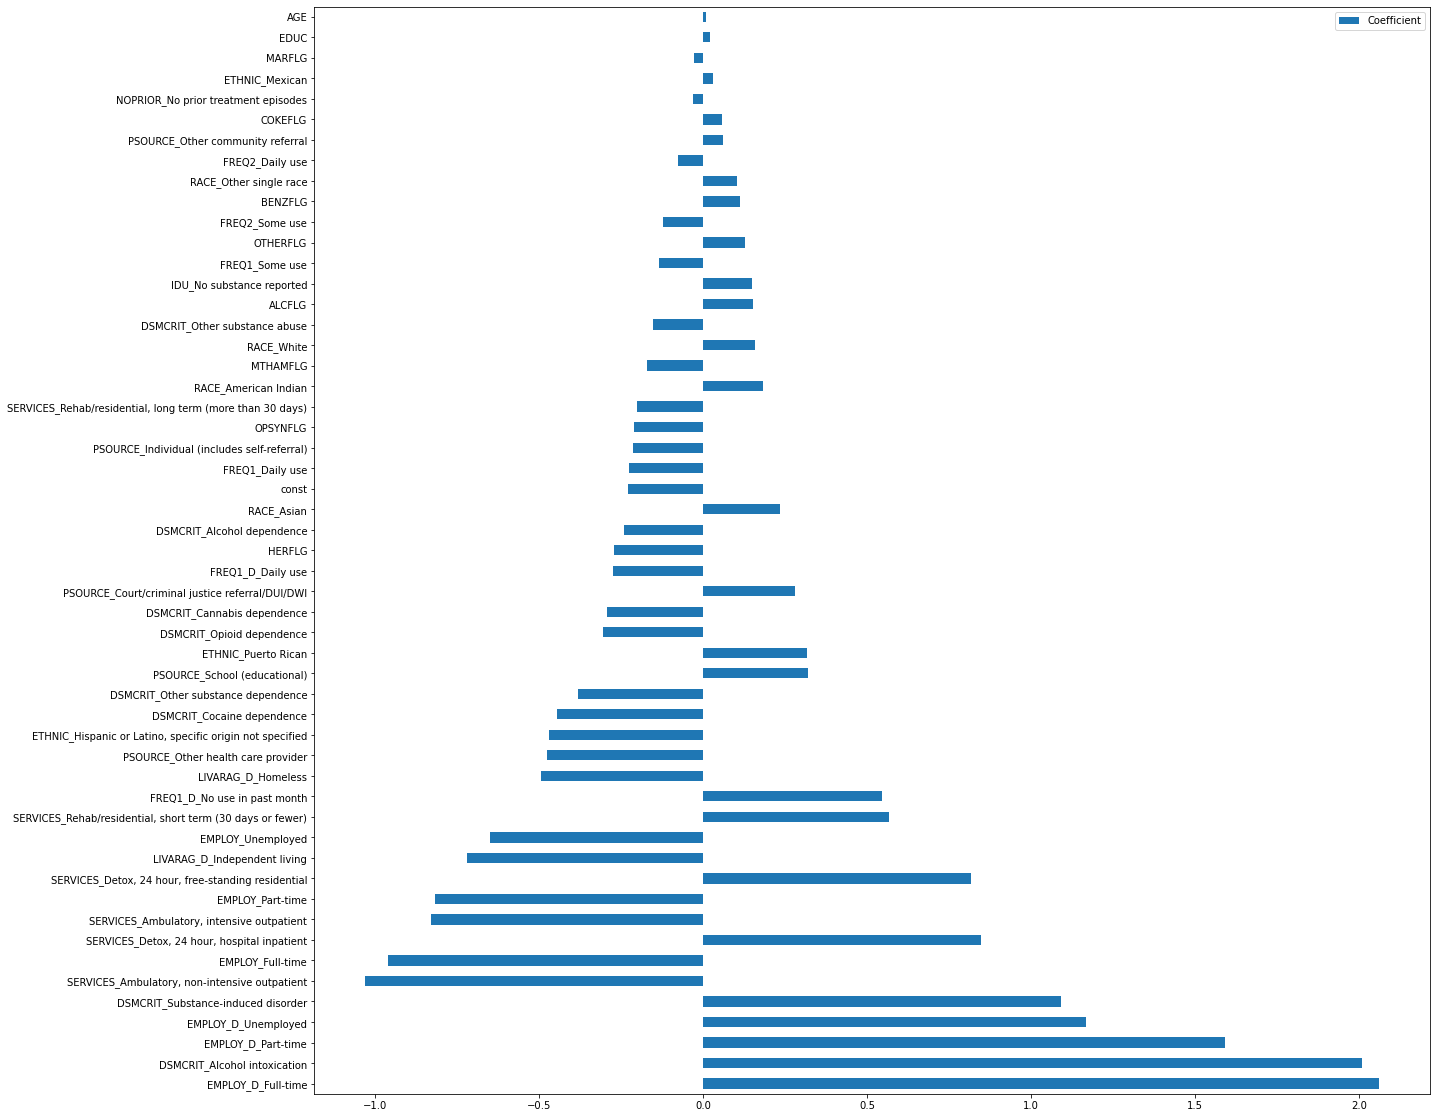

In [38]:
coefficients.plot(kind='barh',figsize=(20,20))

In [39]:
without_employment_ted = ted_data

In [40]:
without_employment_ted = without_employment_ted.drop(columns=['EMPLOY_Unemployed','EMPLOY_Part-time','EMPLOY_Full-time'])

In [41]:
without_employment_ted.to_csv('we_teds.csv',index=False)

In [42]:
without_employment_ted = without_employment_ted.drop(columns=['RACE_White'])

In [43]:
without_employment_ted

,EDUC,REASON,AGE,ALCFLG,COKEFLG,MARFLG,HERFLG,OPSYNFLG,MTHAMFLG,BENZFLG,...,"ETHNIC_Hispanic or Latino, specific origin not specified",ETHNIC_Mexican,ETHNIC_Puerto Rican,FREQ1_Daily use,FREQ1_Some use,FREQ2_Daily use,FREQ2_Some use,FREQ1_D_Daily use,FREQ1_D_No use in past month,IDU_No substance reported
0,12,0,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,12,1,47,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,12,0,47,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3,16,1,37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,12,1,65,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391426,12,0,32,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
391427,12,0,27,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
391428,16,1,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
391429,12,0,22,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [44]:
we_y = without_employment_ted['REASON']
we_X = without_employment_ted.drop(columns='REASON')

In [45]:
we_X = sm.add_constant(we_X)

In [46]:
we_X_train, we_X_test, we_y_train, we_y_test = train_test_split(we_X, we_y, test_size=0.2, random_state=1)

In [47]:
we_model = sm.Logit(we_y_train,we_X_train)
we_results = we_model.fit()

Optimization terminated successfully.
         Current function value: 0.544642
         Iterations 7


In [48]:
we_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 REASON   No. Observations:               313144
Model:                          Logit   Df Residuals:                   313089
Method:                           MLE   Df Model:                           54
Date:                Tue, 09 Nov 2021   Pseudo R-squ.:                  0.2090
Time:                        22:44:01   Log-Likelihood:            -1.7055e+05
converged:                       True   LL-Null:                   -2.1561e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                        -0.0823      0.058     -1.418      0.156      -0.196       0.031
EDUC                                                          0.0102      0.002      4.268      0.000       0.006       0.015
AGE                                                           0.0107      0.000     27.913      0.000       0.010       0.011
ALCFLG                                                        0.1239      0.012     10.553      0.000       0.101       0.147
COKEFLG                                                       0.0302      0.016      1.941      0.052      -0.000       0.061
MARFLG                                                       -0.0341      0.012     -2.922      0.003      -0.057      -0.011
HERFLG                                                       -0.2946      0.016    -18.959      0.000      -0.325      -0.264
OPSYNFLG                                                     -0.2390      0.018    -13.166      0.000      -0.275      -0.203
MTHAMFLG                                                     -0.1837      0.012    -15.285      0.000      -0.207      -0.160
BENZFLG                                                       0.1092      0.028      3.904      0.000       0.054       0.164
OTHERFLG                                                      0.0990      0.032      3.105      0.002       0.037       0.161
SERVICES_Ambulatory, intensive outpatient                    -0.7921      0.032    -24.552      0.000      -0.855      -0.729
SERVICES_Ambulatory, non-intensive outpatient                -1.0319      0.029    -35.127      0.000      -1.090      -0.974
SERVICES_Detox, 24 hour, free-standing residential            0.8803      0.031     28.491      0.000       0.820       0.941
SERVICES_Detox, 24 hour, hospital inpatient                   0.9633      0.049     19.806      0.000       0.868       1.059
SERVICES_Rehab/residential, long term (more than 30 days)    -0.0651      0.031     -2.123      0.034      -0.125      -0.005
SERVICES_Rehab/residential, short term (30 days or fewer)     0.5943      0.036     16.593      0.000       0.524       0.665
PSOURCE_Court/criminal justice referral/DUI/DWI               0.2610      0.018     14.685      0.000       0.226       0.296
PSOURCE_Individual (includes self-referral)                  -0.2051      0.017    -12.150      0.000      -0.238      -0.172
PSOURCE_Other community referral                              0.0607      0.021      2.885      0.004       0.019       0.102
PSOURCE_Other health care provider                           -0.4664      0.025    -18.576      0.000      -0.516      -0.417
PSOURCE_School (educational)                                  0.4669      0.038     12.306      0.000       0.393       0.541
NOPRIOR_No prior treatment episodes                          -0.0255      0.009     -2.837 

In [49]:
predictions = we_results.predict(we_X_test)
predictions_scored = [1 if x>.5 else 0 for x in predictions]
confusion_matrix_test = confusion_matrix(we_y_test, predictions_scored)
print(confusion_matrix_test)
print(classification_report(we_y_test, predictions_scored, target_names=['Rehab_Completed','Rehab_NotCompleted']))

[[34116  8895]
 [13258 22018]]
                    precision    recall  f1-score   support

   Rehab_Completed       0.72      0.79      0.75     43011
Rehab_NotCompleted       0.71      0.62      0.67     35276

          accuracy                           0.72     78287
         macro avg       0.72      0.71      0.71     78287
      weighted avg       0.72      0.72      0.71     78287



In [50]:
we_coefficients = pd.DataFrame(we_results.params).rename(columns={0:'Coefficient'})

In [51]:
we_coefficients

,Coefficient
const,-0.082294
EDUC,0.010209
AGE,0.010710
ALCFLG,0.123929
COKEFLG,0.030167
MARFLG,-0.034146
HERFLG,-0.294603
OPSYNFLG,-0.239049
MTHAMFLG,-0.183660
BENZFLG,0.109232


In [52]:
we_coefficients = we_coefficients.reindex(we_coefficients['Coefficient'].abs().sort_values(ascending=False).index)

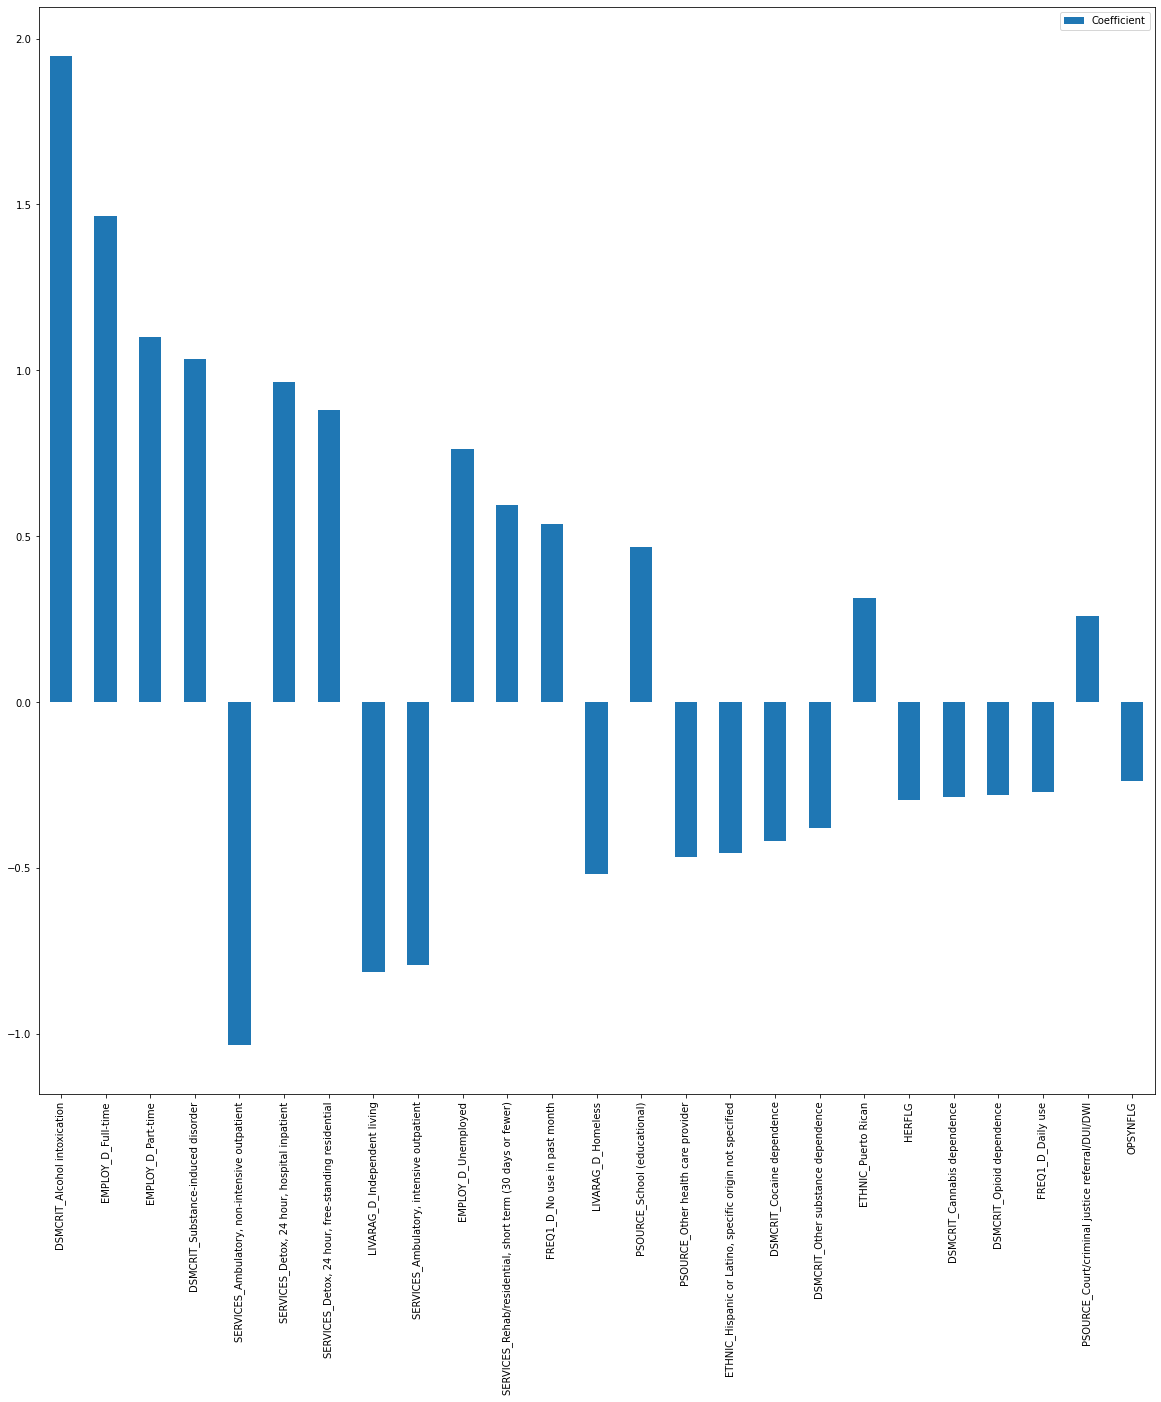

In [53]:
we_coefficients.head(25).plot(kind='bar',figsize=(20,20))

In [54]:
ted_data[((ted_data['EMPLOY_Unemployed'] ==1) | (ted_data['EMPLOY_Part-time'] == 1) | (ted_data['EMPLOY_Full-time'] == 1))]

,EDUC,REASON,AGE,ALCFLG,COKEFLG,MARFLG,HERFLG,OPSYNFLG,MTHAMFLG,BENZFLG,...,"ETHNIC_Hispanic or Latino, specific origin not specified",ETHNIC_Mexican,ETHNIC_Puerto Rican,FREQ1_Daily use,FREQ1_Some use,FREQ2_Daily use,FREQ2_Some use,FREQ1_D_Daily use,FREQ1_D_No use in past month,IDU_No substance reported
0,12,0,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,12,1,47,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,12,0,47,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3,16,1,37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
5,12,1,32,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391423,12,1,52,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
391425,16,0,42,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
391428,16,1,27,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
391429,12,0,22,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [55]:
ted_data[ted_data['EMPLOY_Full-time'] == 1]

,EDUC,REASON,AGE,ALCFLG,COKEFLG,MARFLG,HERFLG,OPSYNFLG,MTHAMFLG,BENZFLG,...,"ETHNIC_Hispanic or Latino, specific origin not specified",ETHNIC_Mexican,ETHNIC_Puerto Rican,FREQ1_Daily use,FREQ1_Some use,FREQ2_Daily use,FREQ2_Some use,FREQ1_D_Daily use,FREQ1_D_No use in past month,IDU_No substance reported
2,12,0,47,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3,16,1,37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
5,12,1,32,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
14,12,0,42,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
15,12,0,42,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391402,14,1,32,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
391403,14,1,32,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
391417,8,0,37,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,1
391418,8,0,37,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [56]:
we_coefficients['exp_coefficient'] = we_coefficients.apply(lambda x: math.exp(x['Coefficient']),axis=1)

In [57]:
we_coefficients

,Coefficient,exp_coefficient
DSMCRIT_Alcohol intoxication,1.946897,7.006914
EMPLOY_D_Full-time,1.466483,4.333965
EMPLOY_D_Part-time,1.101558,3.008849
DSMCRIT_Substance-induced disorder,1.035050,2.815248
"SERVICES_Ambulatory, non-intensive outpatient",-1.031943,0.356314
"SERVICES_Detox, 24 hour, hospital inpatient",0.963309,2.620353
"SERVICES_Detox, 24 hour, free-standing residential",0.880317,2.411663
LIVARAG_D_Independent living,-0.812568,0.443717
"SERVICES_Ambulatory, intensive outpatient",-0.792136,0.452876
EMPLOY_D_Unemployed,0.763877,2.146581


### Sample

In [58]:
sampled_teds = without_employment_ted.sample(n=39144)

In [59]:
sampled_teds

,EDUC,REASON,AGE,ALCFLG,COKEFLG,MARFLG,HERFLG,OPSYNFLG,MTHAMFLG,BENZFLG,...,"ETHNIC_Hispanic or Latino, specific origin not specified",ETHNIC_Mexican,ETHNIC_Puerto Rican,FREQ1_Daily use,FREQ1_Some use,FREQ2_Daily use,FREQ2_Some use,FREQ1_D_Daily use,FREQ1_D_No use in past month,IDU_No substance reported
158766,14,0,32,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
363812,12,1,27,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
195940,12,1,22,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
208752,10,0,22,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,1
6285,10,0,42,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345785,12,0,47,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,1
212807,12,1,47,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
175654,14,0,22,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
366969,10,0,32,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1


In [60]:
sampled_teds[sampled_teds['RACE_Other single race'] == 1]

,EDUC,REASON,AGE,ALCFLG,COKEFLG,MARFLG,HERFLG,OPSYNFLG,MTHAMFLG,BENZFLG,...,"ETHNIC_Hispanic or Latino, specific origin not specified",ETHNIC_Mexican,ETHNIC_Puerto Rican,FREQ1_Daily use,FREQ1_Some use,FREQ2_Daily use,FREQ2_Some use,FREQ1_D_Daily use,FREQ1_D_No use in past month,IDU_No substance reported
158766,14,0,32,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
273605,10,0,37,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
75150,12,0,47,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
343383,10,0,47,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,1,0,1
84413,10,1,16,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336635,8,1,32,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,1,0,1
240795,12,0,37,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
123876,12,0,37,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1
146784,10,0,19,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1


In [61]:
sampled_y = sampled_teds['REASON']
sampled_X = sampled_teds.drop(columns='REASON')

In [62]:
sampled_X = sm.add_constant(sampled_X)

In [63]:
sampled_X_train, sampled_X_test, sampled_y_train, sampled_y_test = train_test_split(sampled_X, sampled_y, test_size=0.2, random_state=1)

In [64]:
sampled_model = sm.Logit(sampled_y_train,sampled_X_train)
sampled_results = sampled_model.fit()

Optimization terminated successfully.
         Current function value: 0.544983
         Iterations 7


In [65]:
sampled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 REASON   No. Observations:                31315
Model:                          Logit   Df Residuals:                    31260
Method:                           MLE   Df Model:                           54
Date:                Tue, 09 Nov 2021   Pseudo R-squ.:                  0.2083
Time:                        22:44:03   Log-Likelihood:                -17066.
converged:                       True   LL-Null:                       -21556.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                        -0.0465      0.182     -0.256      0.798      -0.403       0.310
EDUC                                                          0.0049      0.008      0.643      0.520      -0.010       0.020
AGE                                                           0.0110      0.001      9.044      0.000       0.009       0.013
ALCFLG                                                        0.1173      0.037      3.153      0.002       0.044       0.190
COKEFLG                                                       0.0454      0.049      0.930      0.352      -0.050       0.141
MARFLG                                                       -0.0415      0.037     -1.122      0.262      -0.114       0.031
HERFLG                                                       -0.2638      0.049     -5.412      0.000      -0.359      -0.168
OPSYNFLG                                                     -0.2166      0.057     -3.795      0.000      -0.328      -0.105
MTHAMFLG                                                     -0.1350      0.038     -3.536      0.000      -0.210      -0.060
BENZFLG                                                      -0.0037      0.085     -0.044      0.965      -0.170       0.163
OTHERFLG                                                      0.1770      0.102      1.732      0.083      -0.023       0.377
SERVICES_Ambulatory, intensive outpatient                    -0.9232      0.102     -9.030      0.000      -1.124      -0.723
SERVICES_Ambulatory, non-intensive outpatient                -1.1081      0.093    -11.927      0.000      -1.290      -0.926
SERVICES_Detox, 24 hour, free-standing residential            0.8056      0.098      8.230      0.000       0.614       0.997
SERVICES_Detox, 24 hour, hospital inpatient                   0.6765      0.152      4.459      0.000       0.379       0.974
SERVICES_Rehab/residential, long term (more than 30 days)    -0.1144      0.097     -1.178      0.239      -0.305       0.076
SERVICES_Rehab/residential, short term (30 days or fewer)     0.4483      0.113      3.982      0.000       0.228       0.669
PSOURCE_Court/criminal justice referral/DUI/DWI               0.2216      0.056      3.968      0.000       0.112       0.331
PSOURCE_Individual (includes self-referral)                  -0.1804      0.053     -3.404      0.001      -0.284      -0.077
PSOURCE_Other community referral                              0.0414      0.066      0.626      0.531      -0.088       0.171
PSOURCE_Other health care provider                           -0.3769      0.079     -4.745      0.000      -0.533      -0.221
PSOURCE_School (educational)                                  0.5988      0.122      4.916      0.000       0.360       0.838
NOPRIOR_No prior treatment episodes                          -0.0265      0.028     -0.930 

In [66]:
predictions = sampled_results.predict(sampled_X_test)
predictions_scored = [1 if x>.5 else 0 for x in predictions]
confusion_matrix_test = confusion_matrix(sampled_y_test, predictions_scored)
print(confusion_matrix_test)
print(classification_report(sampled_y_test, predictions_scored, target_names=['Rehab_Completed','Rehab_NotCompleted']))

[[3343  938]
 [1327 2221]]
                    precision    recall  f1-score   support

   Rehab_Completed       0.72      0.78      0.75      4281
Rehab_NotCompleted       0.70      0.63      0.66      3548

          accuracy                           0.71      7829
         macro avg       0.71      0.70      0.70      7829
      weighted avg       0.71      0.71      0.71      7829



### Nonsignificant
1. COKEFLG
2. MARFLG
3. PSOURCE_Other community reference
4. OTHERFLG
5. SERVICES_Rehab/residential, long term (more than 30 days)
6. NOPRIOR_No prior treatment episodes
7. PSYPROB_Yes
8. GENDER_Male
9. VET_Yes
10. DSMCRIT_Cannabis abuse
11. DSMCRIT_Other substance abuse
12. RACE_African American
13. RACE_American Indian
14. RACE_Asian
15. RACE_Other single race
16. RACE_Two or more races
17. RACE_White
18. ETHNIC_Mexican
19. FREQ2_Daily use
20. EDUC
21. DSMCRIT_Cannabis dependence

In [121]:
sampled_coefficient = pd.DataFrame(sampled_results.params).rename(columns={0:'Coefficient'})

In [122]:
sampled_coefficient

,Coefficient
const,-0.046543
EDUC,0.004866
AGE,0.010965
ALCFLG,0.117344
COKEFLG,0.045400
MARFLG,-0.041485
HERFLG,-0.263800
OPSYNFLG,-0.216555
MTHAMFLG,-0.135039
BENZFLG,-0.003743


In [123]:
sampled_coefficient['abs_val'] = sampled_coefficient['Coefficient'].abs()

In [124]:
sampled_coefficient = sampled_coefficient.sort_values(by='abs_val',ascending=False)

In [125]:
sampled_coefficient = sampled_coefficient.drop(columns=['abs_val'])

In [126]:
sampled_coefficient

,Coefficient
DSMCRIT_Alcohol intoxication,1.837344
EMPLOY_D_Full-time,1.450139
EMPLOY_D_Part-time,1.160577
"SERVICES_Ambulatory, non-intensive outpatient",-1.108126
"SERVICES_Ambulatory, intensive outpatient",-0.923171
DSMCRIT_Substance-induced disorder,0.905392
LIVARAG_D_Independent living,-0.825656
"SERVICES_Detox, 24 hour, free-standing residential",0.805579
EMPLOY_D_Unemployed,0.788397
"SERVICES_Detox, 24 hour, hospital inpatient",0.676505


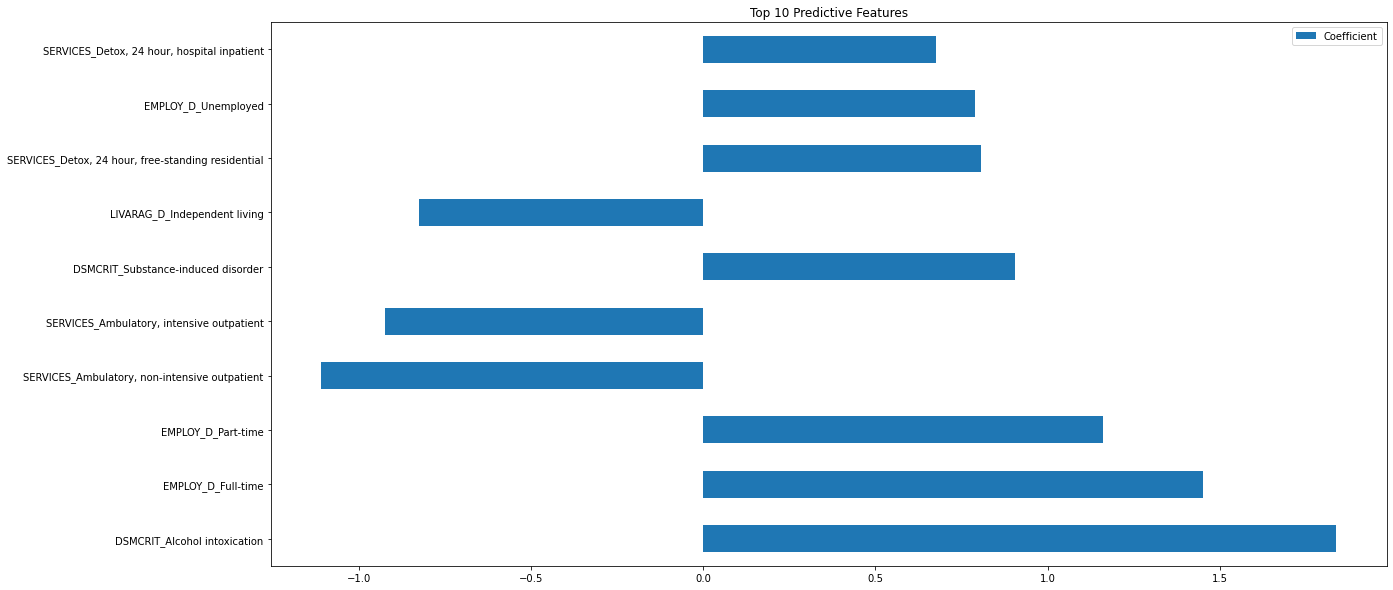

In [136]:
ax = sampled_coefficient.head(10).plot(kind='barh',figsize=(20,10),title='Top 10 Predictive Features')
plt.show()

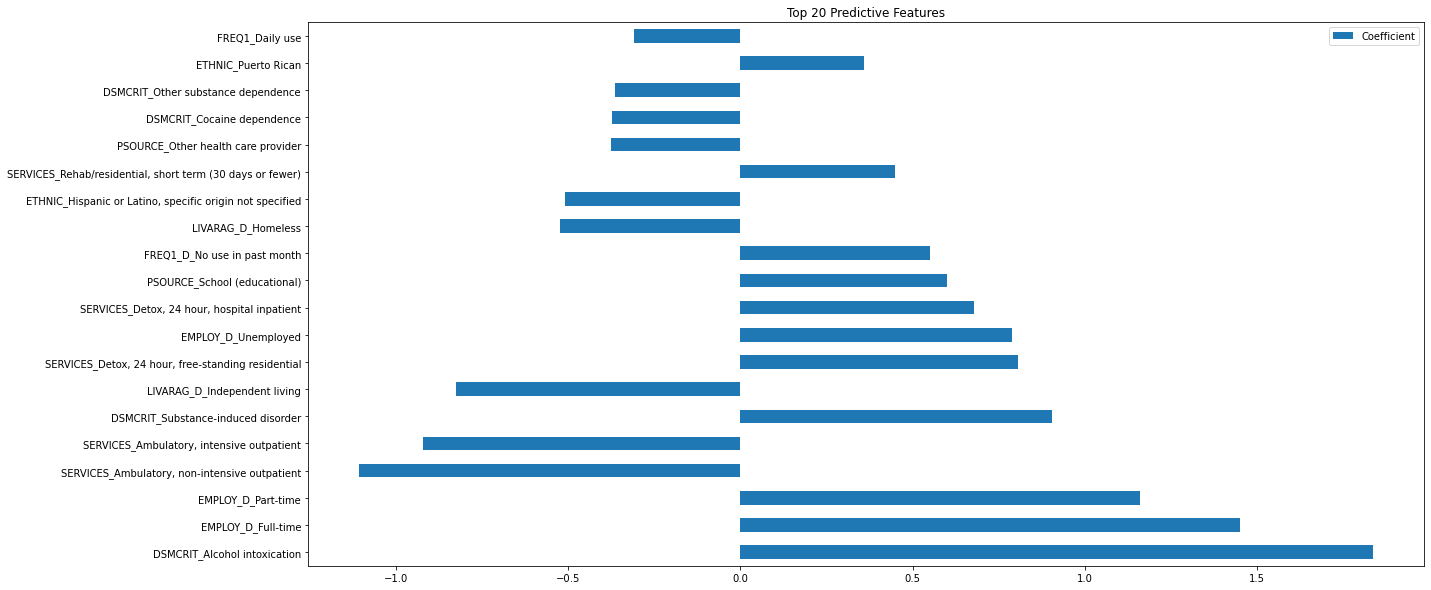

In [137]:
ax = sampled_coefficient.head(20).plot(kind='barh',figsize=(20,10),title='Top 20 Predictive Features')
plt.show()

In [131]:
sampled_coefficient

,Coefficient
DSMCRIT_Alcohol intoxication,1.837344
EMPLOY_D_Full-time,1.450139
EMPLOY_D_Part-time,1.160577
"SERVICES_Ambulatory, non-intensive outpatient",-1.108126
"SERVICES_Ambulatory, intensive outpatient",-0.923171
DSMCRIT_Substance-induced disorder,0.905392
LIVARAG_D_Independent living,-0.825656
"SERVICES_Detox, 24 hour, free-standing residential",0.805579
EMPLOY_D_Unemployed,0.788397
"SERVICES_Detox, 24 hour, hospital inpatient",0.676505


In [70]:
sampled_coefficient['exp_coefficient'] = sampled_coefficient.apply(lambda x: math.exp(x['Coefficient']),axis=1)

In [71]:
sampled_coefficient

,Coefficient,exp_coefficient
const,-0.090792,0.913207
EDUC,0.006144,1.006163
AGE,0.009589,1.009635
ALCFLG,0.067068,1.069369
COKEFLG,0.068805,1.071227
MARFLG,-0.052647,0.948715
HERFLG,-0.277452,0.757712
OPSYNFLG,-0.313199,0.731104
MTHAMFLG,-0.197495,0.820784
BENZFLG,0.165145,1.179564


In [72]:
sampled_coefficient = sampled_coefficient.drop(['const'])

In [73]:
sampled_coefficient = sampled_coefficient.drop(columns=['Coefficient']).rename(columns={'exp_coefficient':'TEDS'})

In [74]:
sampled_coefficient = sampled_coefficient.sort_values(by=['TEDS'],ascending=False)

In [75]:
sampled_coefficient

,TEDS
DSMCRIT_Alcohol intoxication,6.203037
EMPLOY_D_Full-time,4.037778
EMPLOY_D_Part-time,3.108835
DSMCRIT_Substance-induced disorder,2.657506
"SERVICES_Detox, 24 hour, free-standing residential",2.530770
"SERVICES_Detox, 24 hour, hospital inpatient",2.423680
EMPLOY_D_Unemployed,2.137797
"SERVICES_Rehab/residential, short term (30 days or fewer)",2.097710
FREQ1_D_No use in past month,1.809689
PSOURCE_School (educational),1.801228


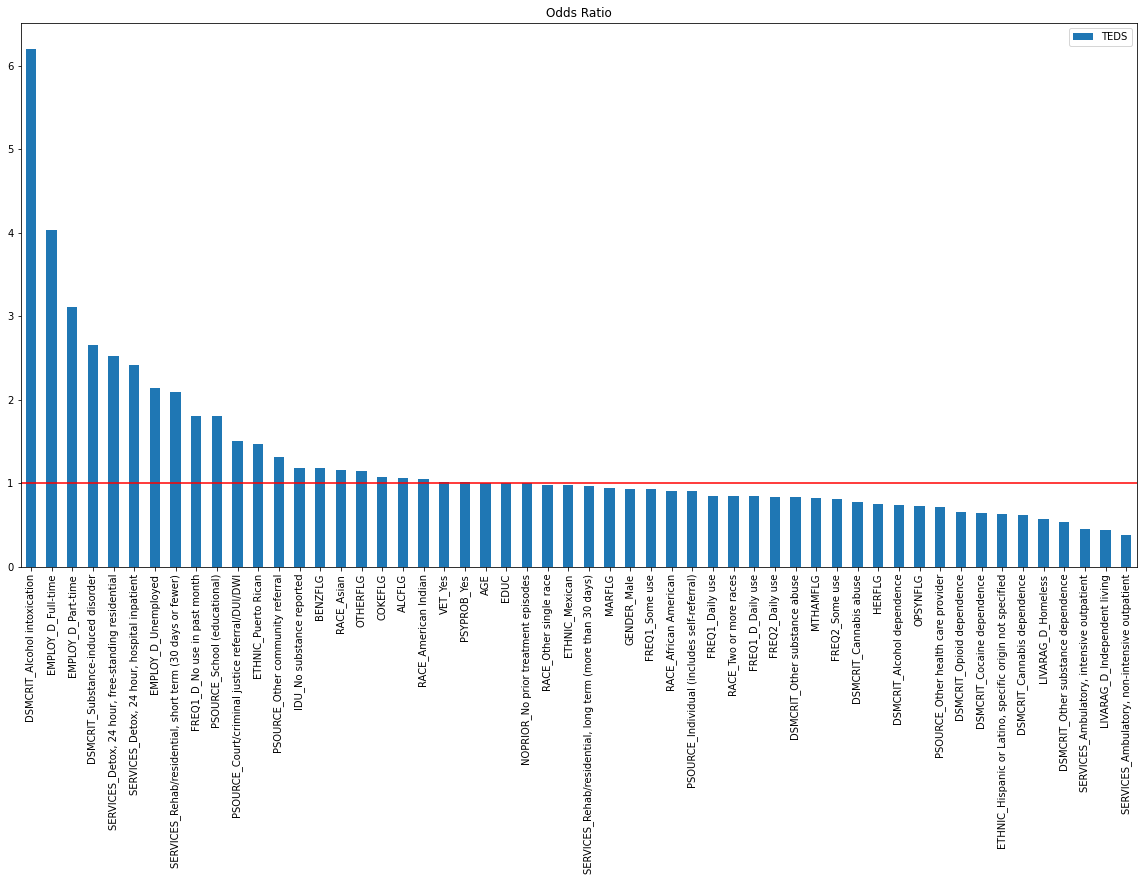

In [76]:
ax = sampled_coefficient.plot(kind='bar',figsize=(20,10),title='Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

In [77]:
sampled_coefficient = sampled_coefficient.reset_index()

## RS - TEDS

In [80]:
without_employment_ted = pd.read_csv('we_teds.csv')

In [81]:
random_african_american = without_employment_ted[without_employment_ted['RACE_African American'] == 1].sample(n=34301)
random_white = without_employment_ted[without_employment_ted['RACE_White'] == 1].sample(n=3431)
#added hispanic population to white
random_biracial = without_employment_ted[without_employment_ted['RACE_Two or more races'] == 1].sample(n=807)
random_other = without_employment_ted[without_employment_ted['RACE_Other single race'] == 1].sample(n=403)
random_indian = without_employment_ted[without_employment_ted['RACE_American Indian'] == 1].sample(n=202)
frames = [random_african_american, random_white, random_biracial, random_other, random_indian]
sampled_demographic = pd.concat(frames)

In [82]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(sampled_demographic, 25))

Top Absolute Correlations
RACE_African American                               RACE_White                                                   0.824885
LIVARAG_D_Homeless                                  LIVARAG_D_Independent living                                 0.638830
PSOURCE_Court/criminal justice referral/DUI/DWI     PSOURCE_Individual (includes self-referral)                  0.595453
FREQ1_Daily use                                     FREQ1_Some use                                               0.594033
FREQ2_Daily use                                     FREQ2_Some use                                               0.566173
FREQ1_Daily use                                     FREQ1_D_Daily use                                            0.496328
SERVICES_Ambulatory, non-intensive outpatient       SERVICES_Detox, 24 hour, free-standing residential           0.469410
HERFLG                                              IDU_No substance reported                                    0.46535

In [83]:
for c in sampled_demographic.columns:
    print("---- %s ---" % c)
    print(sampled_demographic[c].value_counts())

---- EDUC ---
12    18886
10    10321
14     6400
8      2154
16     1383
Name: EDUC, dtype: int64
---- REASON ---
0    21612
1    17532
Name: REASON, dtype: int64
---- AGE ---
27    5728
32    5217
60    5101
37    4728
52    4274
47    4106
42    3552
22    3008
16    1310
19    1198
65     694
13     228
Name: AGE, dtype: int64
---- ALCFLG ---
0    23080
1    16064
Name: ALCFLG, dtype: int64
---- COKEFLG ---
0    30028
1     9116
Name: COKEFLG, dtype: int64
---- MARFLG ---
0    24792
1    14352
Name: MARFLG, dtype: int64
---- HERFLG ---
0    32243
1     6901
Name: HERFLG, dtype: int64
---- OPSYNFLG ---
0    37377
1     1767
Name: OPSYNFLG, dtype: int64
---- MTHAMFLG ---
0    29838
1     9306
Name: MTHAMFLG, dtype: int64
---- BENZFLG ---
0    38679
1      465
Name: BENZFLG, dtype: int64
---- OTHERFLG ---
0    38035
1     1109
Name: OTHERFLG, dtype: int64
---- SERVICES_Ambulatory, intensive outpatient ---
0    35161
1     3983
Name: SERVICES_Ambulatory, intensive outpatient, dtype: in

### Uninformative Features

1. SERVICES_Detox, 24 hour, hospital inpatient
2. DSMCRIT_Other substance abuse
3. RACE_American Indian
4. RACE_Asian
5. RACE_Other single race
6. ETHNIC_Hispanic or Latino, specific origin not specified

In [84]:
sampled_demographic = sampled_demographic.drop(columns=['SERVICES_Detox, 24 hour, hospital inpatient','DSMCRIT_Other substance abuse','RACE_Asian','ETHNIC_Hispanic or Latino, specific origin not specified'])

In [85]:
sampled_demographic = sampled_demographic.drop(columns=['RACE_White'])

In [86]:
rs_sampled_y = sampled_demographic['REASON']
rs_sampled_X = sampled_demographic.drop(columns='REASON')
rs_sampled_X = sm.add_constant(rs_sampled_X)
rs_sampled_X_train, rs_sampled_X_test, rs_sampled_y_train, rs_sampled_y_test = train_test_split(rs_sampled_X, rs_sampled_y, test_size=0.2, random_state=1)
rs_sampled_model = sm.Logit(rs_sampled_y_train,rs_sampled_X_train)
rs_sampled_results = rs_sampled_model.fit()


Optimization terminated successfully.
         Current function value: 0.547929
         Iterations 8


In [87]:
rs_sampled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 REASON   No. Observations:                31315
Model:                          Logit   Df Residuals:                    31264
Method:                           MLE   Df Model:                           50
Date:                Wed, 03 Nov 2021   Pseudo R-squ.:                  0.2033
Time:                        10:43:47   Log-Likelihood:                -17158.
converged:                       True   LL-Null:                       -21536.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         0.5231      0.182      2.875      0.004       0.166       0.880
EDUC                                                          0.0209      0.008      2.647      0.008       0.005       0.036
AGE                                                           0.0111      0.001      9.276      0.000       0.009       0.014
ALCFLG                                                        0.1507      0.036      4.214      0.000       0.081       0.221
COKEFLG                                                       0.0882      0.040      2.213      0.027       0.010       0.166
MARFLG                                                       -0.0665      0.037     -1.788      0.074      -0.139       0.006
HERFLG                                                       -0.3209      0.053     -6.085      0.000      -0.424      -0.218
OPSYNFLG                                                     -0.2136      0.070     -3.050      0.002      -0.351      -0.076
MTHAMFLG                                                     -0.1627      0.041     -4.010      0.000      -0.242      -0.083
BENZFLG                                                      -0.0777      0.122     -0.637      0.524      -0.317       0.161
OTHERFLG                                                      0.0791      0.119      0.665      0.506      -0.154       0.312
SERVICES_Ambulatory, intensive outpatient                    -1.6973      0.087    -19.508      0.000      -1.868      -1.527
SERVICES_Ambulatory, non-intensive outpatient                -1.7664      0.079    -22.308      0.000      -1.922      -1.611
SERVICES_Detox, 24 hour, free-standing residential            0.4349      0.084      5.197      0.000       0.271       0.599
SERVICES_Rehab/residential, long term (more than 30 days)    -0.9047      0.083    -10.864      0.000      -1.068      -0.742
SERVICES_Rehab/residential, short term (30 days or fewer)    -0.2185      0.100     -2.178      0.029      -0.415      -0.022
PSOURCE_Court/criminal justice referral/DUI/DWI               0.2438      0.055      4.397      0.000       0.135       0.352
PSOURCE_Individual (includes self-referral)                  -0.1988      0.053     -3.777      0.000      -0.302      -0.096
PSOURCE_Other community referral                              0.1063      0.065      1.639      0.101      -0.021       0.233
PSOURCE_Other health care provider                           -0.5990      0.078     -7.695      0.000      -0.752      -0.446
PSOURCE_School (educational)                                  0.4773      0.132      3.624      0.000       0.219       0.735
NOPRIOR_No prior treatment episodes                           0.0088      0.028      0.310      0.756      -0.047       0.064
PSYPROB_Yes                                                   0.2102      0.030      6.936 

In [88]:
predictions = rs_sampled_results.predict(rs_sampled_X_test)
predictions_scored = [1 if x>.5 else 0 for x in predictions]
confusion_matrix_test = confusion_matrix(rs_sampled_y_test, predictions_scored)
print(confusion_matrix_test)
print(classification_report(rs_sampled_y_test, predictions_scored, target_names=['Rehab_Completed','Rehab_NotCompleted']))

[[3454  869]
 [1364 2142]]
                    precision    recall  f1-score   support

   Rehab_Completed       0.72      0.80      0.76      4323
Rehab_NotCompleted       0.71      0.61      0.66      3506

          accuracy                           0.71      7829
         macro avg       0.71      0.70      0.71      7829
      weighted avg       0.71      0.71      0.71      7829



In [89]:

rs_sampled_coefficient = pd.DataFrame(rs_sampled_results.params).rename(columns={0:'Coefficient'})
rs_sampled_coefficient['exp_coefficient'] = rs_sampled_coefficient.apply(lambda x: math.exp(x['Coefficient']),axis=1)
rs_sampled_coefficient = rs_sampled_coefficient.drop(['const'])
rs_sampled_coefficient = rs_sampled_coefficient.drop(columns=['Coefficient']).rename(columns={'exp_coefficient':'RS-TEDS'})
rs_sampled_coefficient = rs_sampled_coefficient.sort_values(by=['RS-TEDS'],ascending=False)

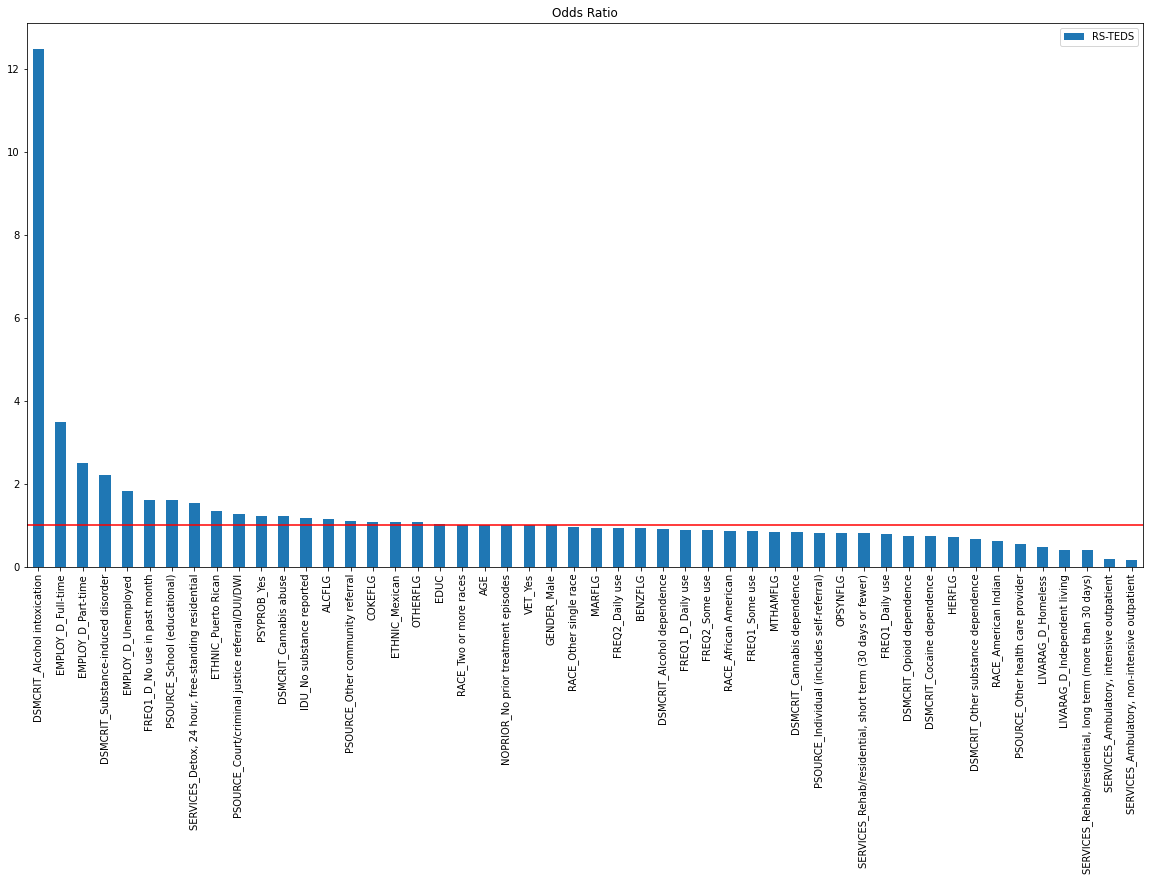

In [90]:
ax = rs_sampled_coefficient.plot(kind='bar',figsize=(20,10),title='Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

In [91]:
rs_sampled_coefficient = rs_sampled_coefficient.reset_index()

### RS-TEDS-STAND

In [92]:
RS_TEDS_STAND = sampled_demographic

In [93]:
RS_TEDS_STAND.columns

Index(['EDUC', 'REASON', 'AGE', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'OPSYNFLG', 'MTHAMFLG', 'BENZFLG', 'OTHERFLG',
       'SERVICES_Ambulatory, intensive outpatient',
       'SERVICES_Ambulatory, non-intensive outpatient',
       'SERVICES_Detox, 24 hour, free-standing residential',
       'SERVICES_Rehab/residential, long term (more than 30 days)',
       'SERVICES_Rehab/residential, short term (30 days or fewer)',
       'PSOURCE_Court/criminal justice referral/DUI/DWI',
       'PSOURCE_Individual (includes self-referral)',
       'PSOURCE_Other community referral',
       'PSOURCE_Other health care provider', 'PSOURCE_School (educational)',
       'NOPRIOR_No prior treatment episodes', 'PSYPROB_Yes', 'GENDER_Male',
       'VET_Yes', 'EMPLOY_D_Full-time', 'EMPLOY_D_Part-time',
       'EMPLOY_D_Unemployed', 'LIVARAG_D_Homeless',
       'LIVARAG_D_Independent living', 'DSMCRIT_Alcohol dependence',
       'DSMCRIT_Alcohol intoxication', 'DSMCRIT_Cannabis abuse',
       'DSMC

In [94]:
RS_TEDS_STAND = RS_TEDS_STAND.loc[:,~RS_TEDS_STAND.columns.str.startswith('SERVICES')]

In [95]:
RS_TEDS_STAND = RS_TEDS_STAND.drop(columns=['VET_Yes'])

In [96]:
RS_TEDS_STAND = RS_TEDS_STAND.loc[:,~RS_TEDS_STAND.columns.str.startswith('ETHNIC')]

In [97]:
RS_TEDS_STAND = RS_TEDS_STAND.loc[:,~RS_TEDS_STAND.columns.str.startswith('FREQ')]

In [98]:
RS_TEDS_STAND = RS_TEDS_STAND.drop(columns=['IDU_No substance reported'])

In [99]:
rs_ted_stand_sampled_y = RS_TEDS_STAND['REASON']
rs_ted_stand_sampled_X = RS_TEDS_STAND.drop(columns='REASON')
rs_ted_stand_sampled_X = sm.add_constant(rs_ted_stand_sampled_X)
rs_ted_stand_sampled_X_train, rs_ted_stand_sampled_X_test, rs_ted_stand_sampled_y_train, rs_ted_stand_sampled_y_test = train_test_split(rs_ted_stand_sampled_X, rs_ted_stand_sampled_y, test_size=0.2, random_state=1)
rs_ted_stand_sampled_model = sm.Logit(rs_ted_stand_sampled_y_train,rs_ted_stand_sampled_X_train)
rs_ted_stand_sampled_results = rs_ted_stand_sampled_model.fit()


Optimization terminated successfully.
         Current function value: 0.595208
         Iterations 8


In [100]:
rs_ted_stand_sampled_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 REASON   No. Observations:                31315
Model:                          Logit   Df Residuals:                    31279
Method:                           MLE   Df Model:                           35
Date:                Wed, 03 Nov 2021   Pseudo R-squ.:                  0.1345
Time:                        10:44:53   Log-Likelihood:                -18639.
converged:                       True   LL-Null:                       -21536.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -0.6447      0.137     -4.694      0.000      -0.914      -0.376
EDUC                                                0.0265      0.007      3.563      0.000       0.012       0.041
AGE                                                 0.0121      0.001     10.710      0.000       0.010       0.014
ALCFLG                                              0.1710      0.031      5.557      0.000       0.111       0.231
COKEFLG                                             0.1362      0.034      4.001      0.000       0.069       0.203
MARFLG                                             -0.2321      0.031     -7.393      0.000      -0.294      -0.171
HERFLG                                             -0.5763      0.039    -14.634      0.000      -0.653      -0.499
OPSYNFLG                                           -0.2891      0.063     -4.571      0.000      -0.413      -0.165
MTHAMFLG                                           -0.0560      0.034     -1.635      0.102      -0.123       0.011
BENZFLG                                             0.0474      0.115      0.413      0.680      -0.178       0.272
OTHERFLG                                            0.0811      0.110      0.739      0.460      -0.134       0.296
PSOURCE_Court/criminal justice referral/DUI/DWI    -0.1040      0.052     -2.015      0.044      -0.205      -0.003
PSOURCE_Individual (includes self-referral)        -0.3202      0.049     -6.547      0.000      -0.416      -0.224
PSOURCE_Other community referral                   -0.1813      0.061     -2.961      0.003      -0.301      -0.061
PSOURCE_Other health care provider                 -0.4914      0.072     -6.796      0.000      -0.633      -0.350
PSOURCE_School (educational)                       -0.1725      0.128     -1.345      0.179      -0.424       0.079
NOPRIOR_No prior treatment episodes                 0.0434      0.027      1.630      0.103      -0.009       0.096
PSYPROB_Yes                                         0.2296      0.029      8.044      0.000       0.174       0.286
GENDER_Male                                         0.0969      0.027      3.526      0.000       0.043       0.151
EMPLOY_D_Full-time                                  1.0372      0.042     24.831      0.000       0.955       1.119
EMPLOY_D_Part-time                                  0.6930      0.052     13.211      0.000       0.590       0.796
EMPLOY_D_Unemployed                                 0.5847      0.031     18.813      0.000       0.524       0.646
LIVARAG_D_Homeless                                 -0.2439      0.039     -6.251      0.000      -0.320      -0.167
LIVARAG_D_Independent living                       -0.9596      0.033    -29.145      0.000      -1.024      -0.895
DSMCRIT_Alcohol dependence                          0.1904      0.076      2.508      0.012       0.042      

In [101]:
predictions = rs_ted_stand_sampled_results.predict(rs_ted_stand_sampled_X_test)
predictions_scored = [1 if x>.5 else 0 for x in predictions]
confusion_matrix_test = confusion_matrix(rs_ted_stand_sampled_y_test, predictions_scored)
print(confusion_matrix_test)
print(classification_report(rs_ted_stand_sampled_y_test, predictions_scored, target_names=['Rehab_Completed','Rehab_NotCompleted']))

[[3384  939]
 [1762 1744]]
                    precision    recall  f1-score   support

   Rehab_Completed       0.66      0.78      0.71      4323
Rehab_NotCompleted       0.65      0.50      0.56      3506

          accuracy                           0.66      7829
         macro avg       0.65      0.64      0.64      7829
      weighted avg       0.65      0.66      0.65      7829



In [102]:

rs_ted_stand_sampled_coefficient = pd.DataFrame(rs_ted_stand_sampled_results.params).rename(columns={0:'Coefficient'})
rs_ted_stand_sampled_coefficient['exp_coefficient'] = rs_ted_stand_sampled_coefficient.apply(lambda x: math.exp(x['Coefficient']),axis=1)
rs_ted_stand_sampled_coefficient = rs_ted_stand_sampled_coefficient.drop(['const'])
rs_ted_stand_sampled_coefficient = rs_ted_stand_sampled_coefficient.drop(columns=['Coefficient']).rename(columns={'exp_coefficient':'RS-TEDS-STAND'})
rs_ted_stand_sampled_coefficient = rs_ted_stand_sampled_coefficient.sort_values(by=['RS-TEDS-STAND'],ascending=False)

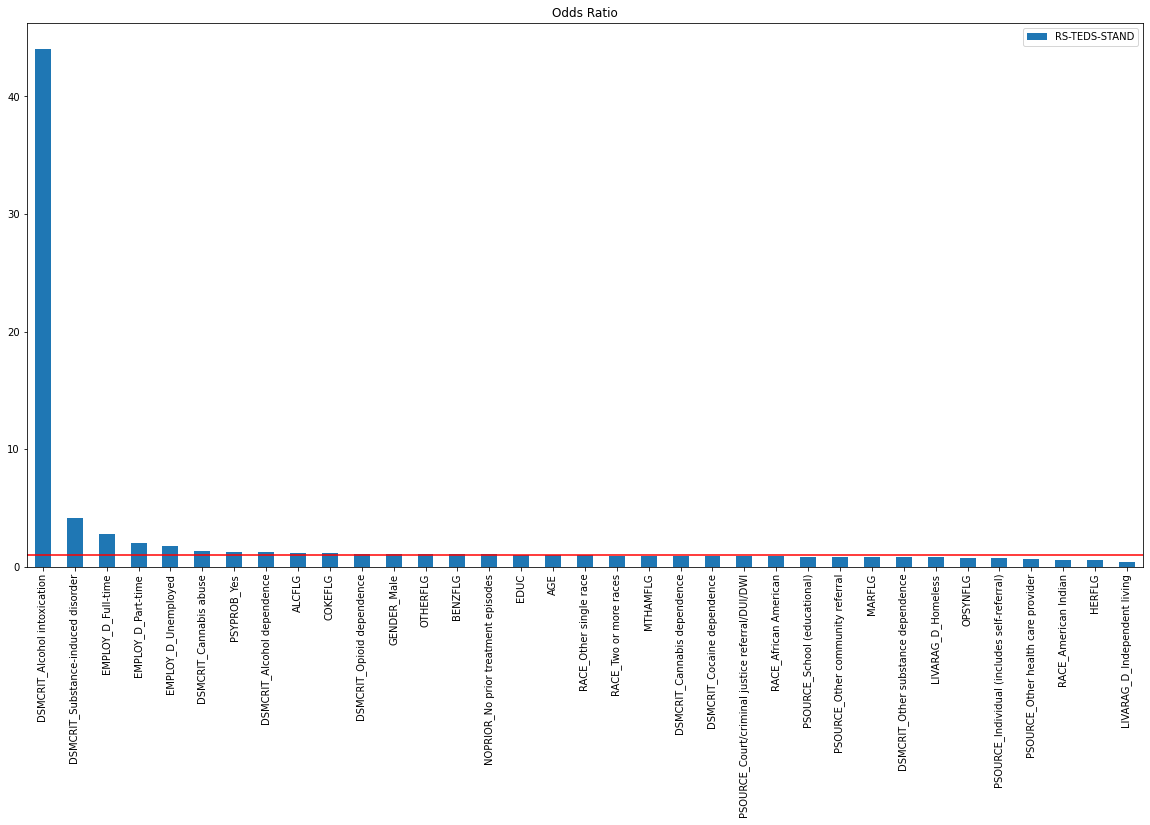

In [103]:
ax = rs_ted_stand_sampled_coefficient.plot(kind='bar',figsize=(20,10),title='Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

In [104]:
rs_ted_stand_sampled_coefficient = rs_ted_stand_sampled_coefficient.reset_index()

In [105]:
rs_ted_stand_sampled_coefficient

,index,RS-TEDS-STAND
0,DSMCRIT_Alcohol intoxication,44.038269
1,DSMCRIT_Substance-induced disorder,4.120254
2,EMPLOY_D_Full-time,2.821305
3,EMPLOY_D_Part-time,1.999769
4,EMPLOY_D_Unemployed,1.794505
5,DSMCRIT_Cannabis abuse,1.336446
6,PSYPROB_Yes,1.258090
7,DSMCRIT_Alcohol dependence,1.209778
8,ALCFLG,1.186537
9,COKEFLG,1.145855


### Combine them all

In [106]:
combined = sampled_coefficient.merge(rs_sampled_coefficient, on='index',how='left')

In [107]:
combined = combined.merge(rs_ted_stand_sampled_coefficient,on='index',how='left')

In [108]:
combined = combined.set_index('index')

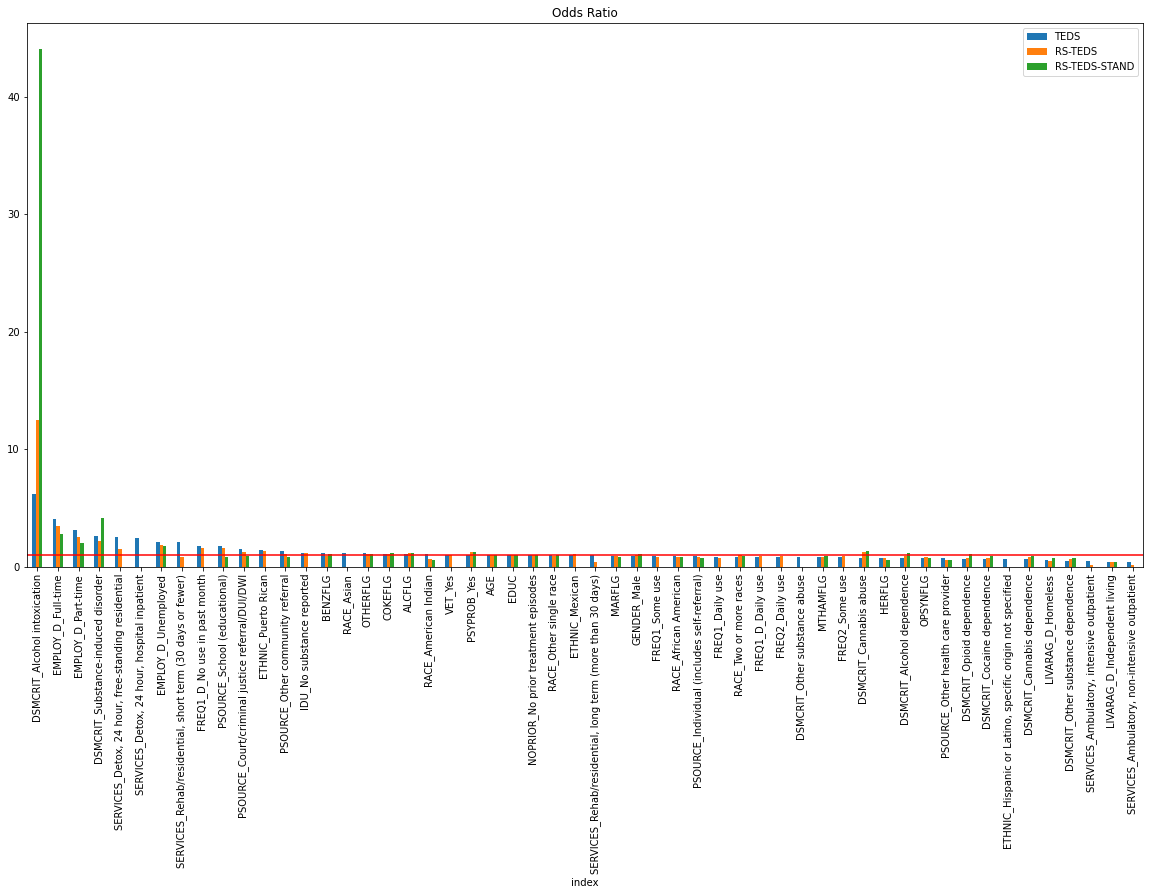

In [109]:
ax = combined.plot(kind='bar',figsize=(20,10),title='Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

### Race

In [110]:
RACE_coeff = combined[combined.index.str.startswith('RACE')]

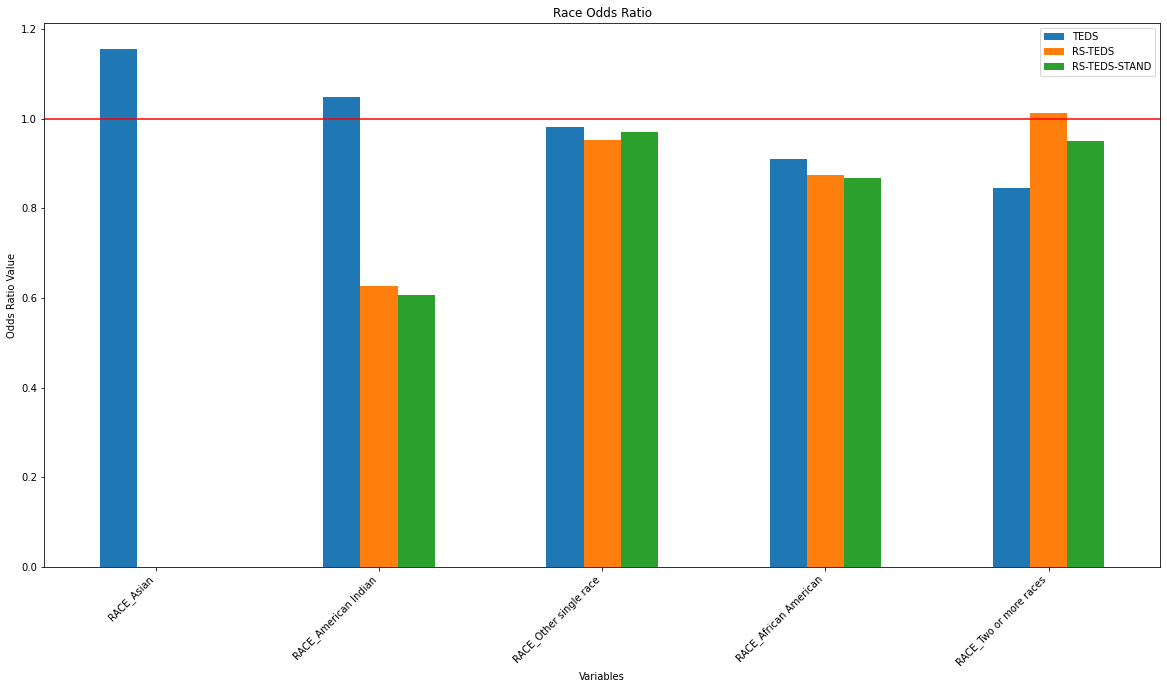

In [111]:
ax = RACE_coeff.plot(kind='bar',figsize=(20,10),title='Race Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

### Demographics

In [112]:
demographic_coeff = combined.reset_index()

In [113]:
demographic_coeff = demographic_coeff[(demographic_coeff['index'] == 'AGE') | (demographic_coeff['index'] == 'GENDER_Male') | (demographic_coeff['index'] == 'EDUC')]

In [114]:
demographic_coeff = demographic_coeff.set_index('index')

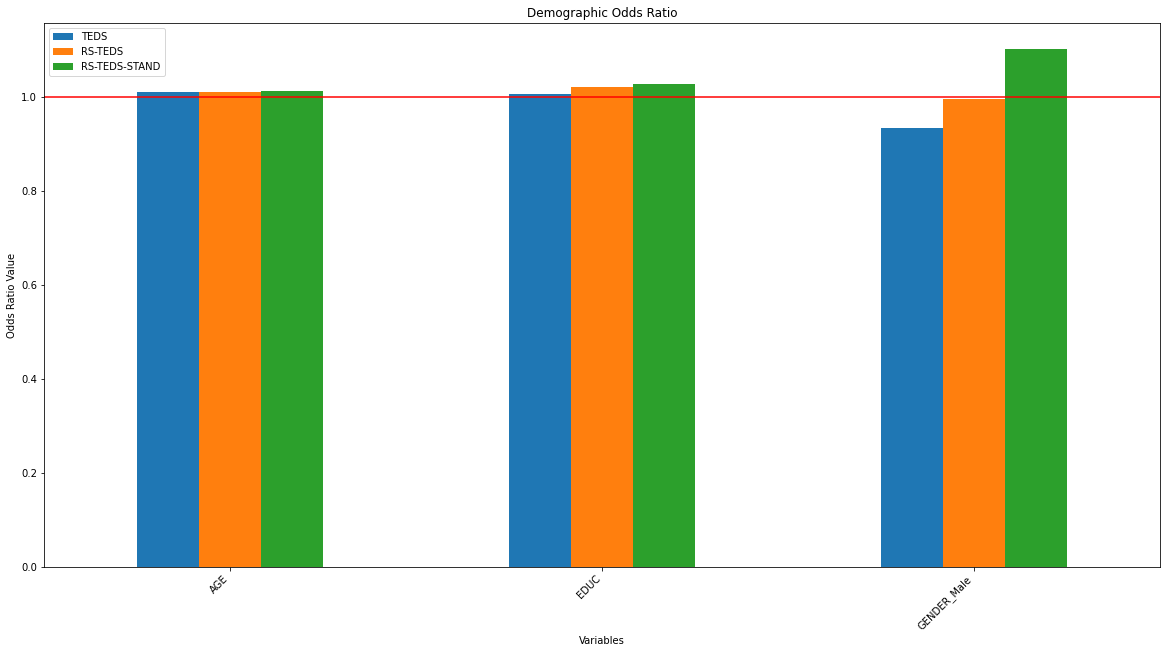

In [115]:
ax = demographic_coeff.plot(kind='bar',figsize=(20,10),title='Demographic Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

### Living Arrangements

In [116]:
LIVARAG_coeff = combined[combined.index.str.startswith('LIVARAG')]

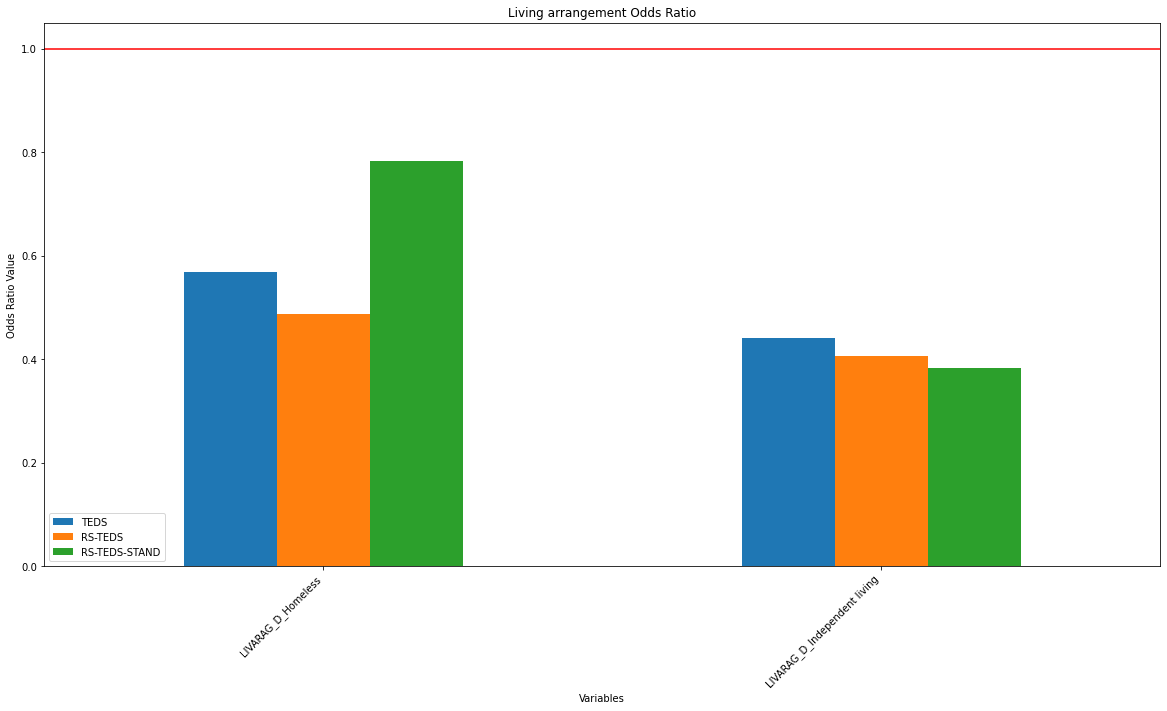

In [117]:
ax = LIVARAG_coeff.plot(kind='bar',figsize=(20,10),title='Living arrangement Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

### Employment

In [118]:
EMPLOY_coeff = combined[combined.index.str.startswith('EMPLOY')]

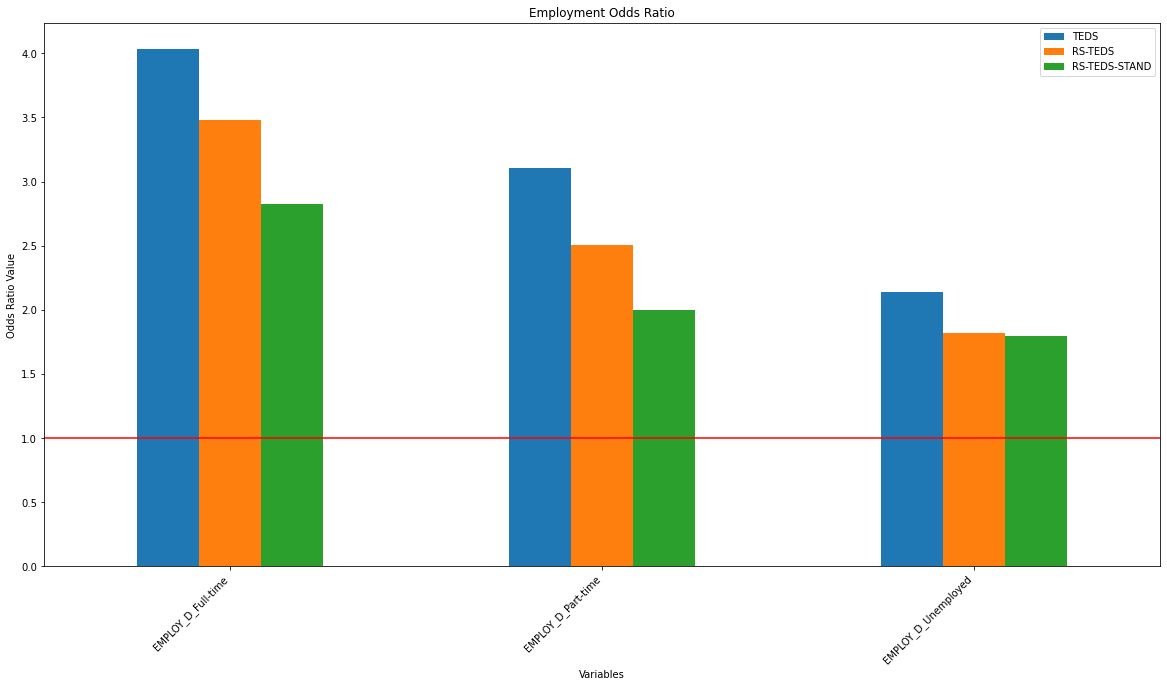

In [119]:
ax = EMPLOY_coeff.plot(kind='bar',figsize=(20,10),title='Employment Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

### Reference

In [120]:
psource_coeff = combined[combined.index.str.startswith('PSOURCE')]

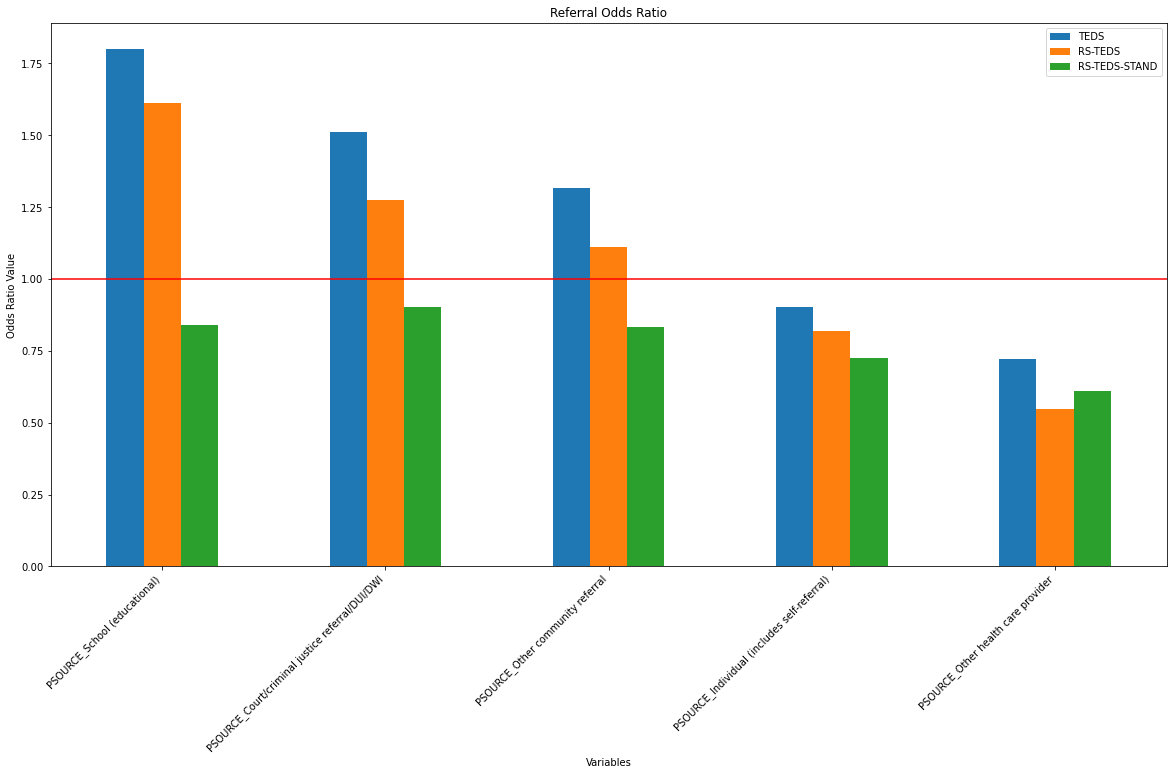

In [121]:
ax = psource_coeff.plot(kind='bar',figsize=(20,10),title='Referral Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

In [122]:
Substance_coeff = combined[combined.index.str.endswith('FLG')]

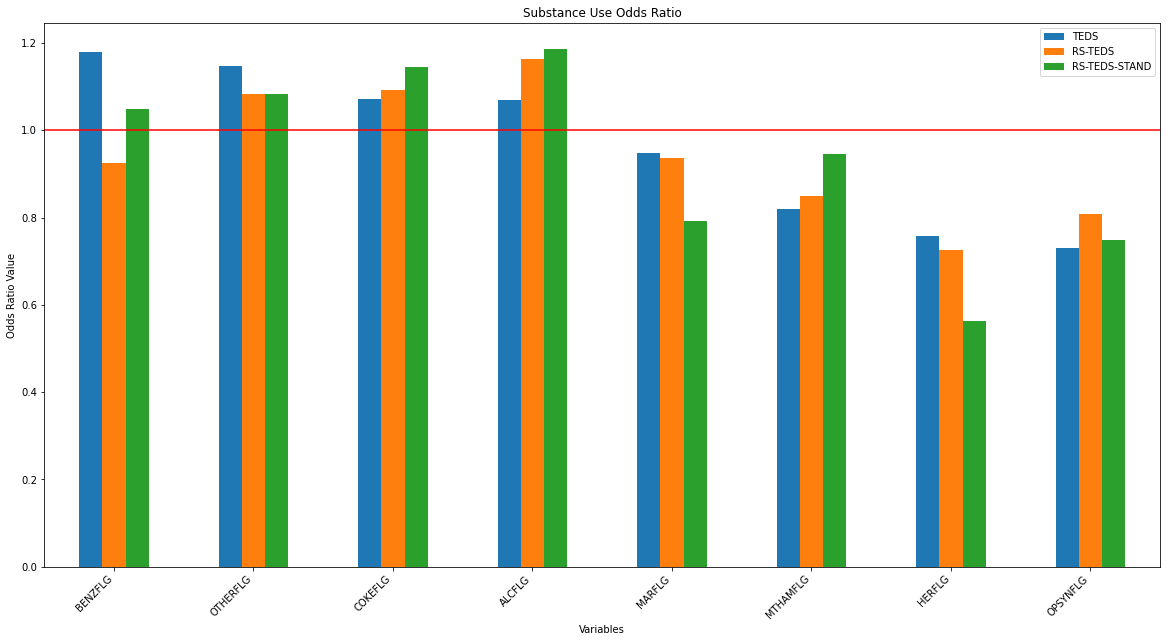

In [123]:
ax = Substance_coeff.plot(kind='bar',figsize=(20,10),title='Substance Use Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

### Substance Use Frequency

In [124]:
freq_coeff = combined[combined.index.str.startswith('FREQ')]

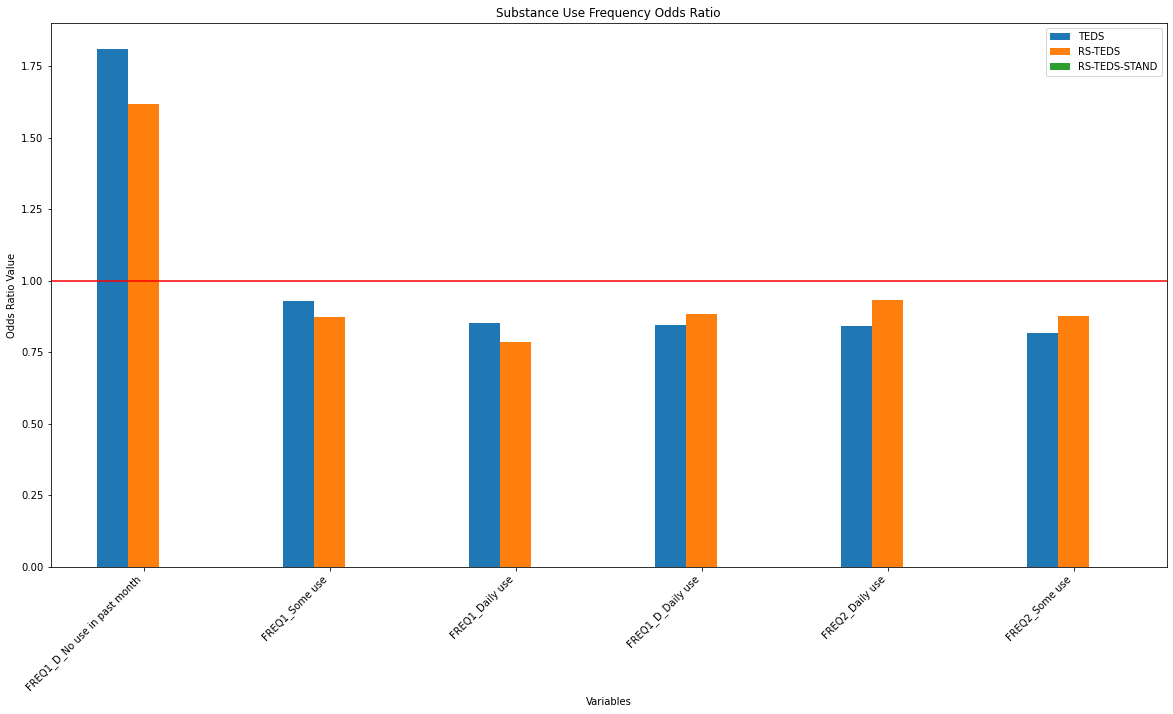

In [125]:
ax = freq_coeff.plot(kind='bar',figsize=(20,10),title='Substance Use Frequency Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

In [126]:
no_use_freq = freq_coeff.drop(['FREQ1_D_No use in past month'])

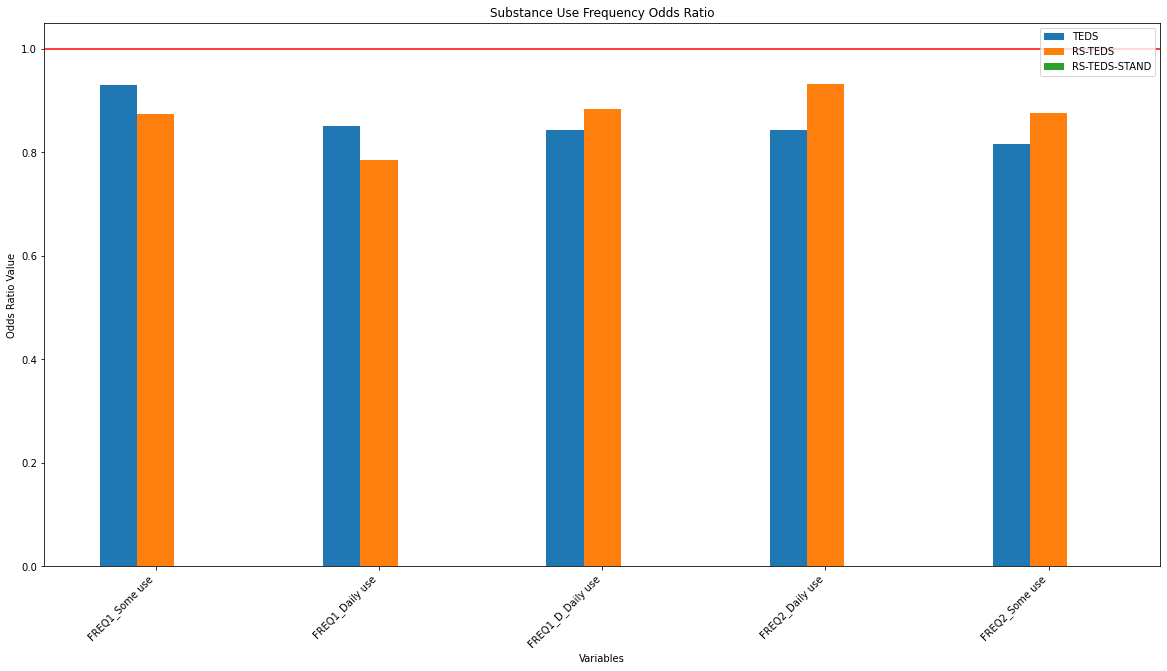

In [127]:
ax = no_use_freq.plot(kind='bar',figsize=(20,10),title='Substance Use Frequency Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

### DSMCRIT Diagnosis

In [128]:
dsmcrit_coeff = combined[combined.index.str.startswith('DSMCRIT')]

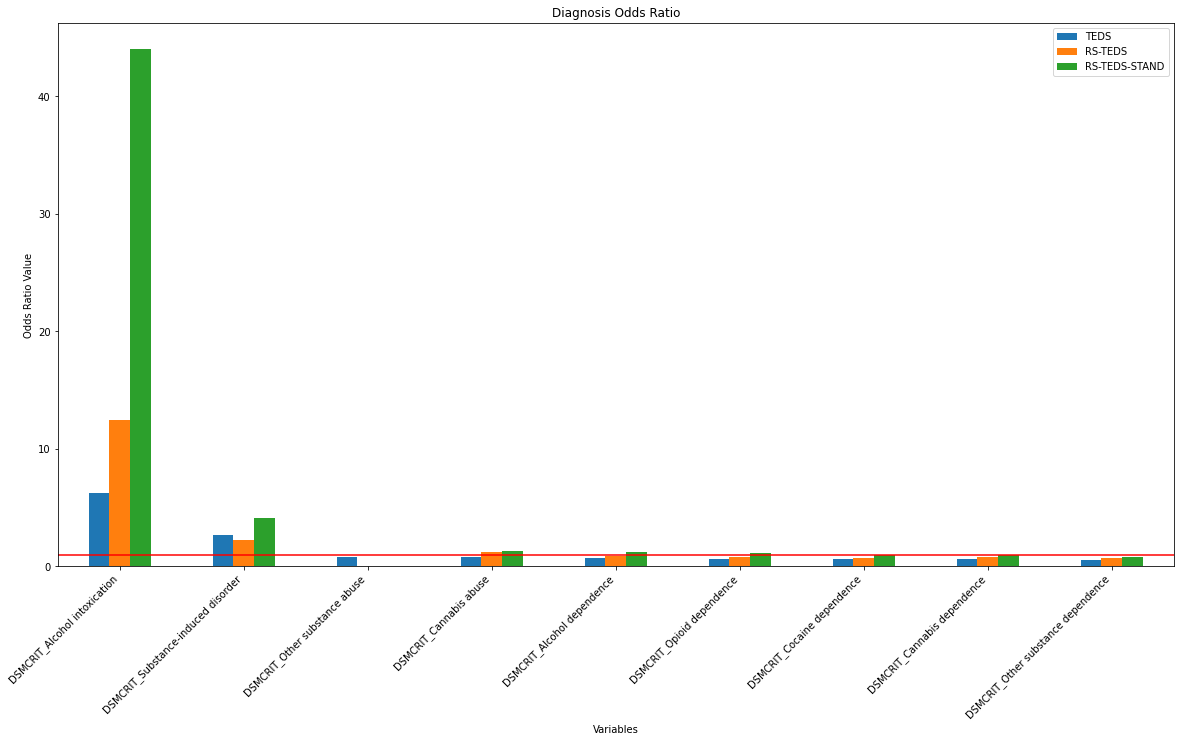

In [129]:
ax = dsmcrit_coeff.plot(kind='bar',figsize=(20,10),title='Diagnosis Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

In [130]:
no_intoxication = dsmcrit_coeff.drop(['DSMCRIT_Alcohol intoxication'])

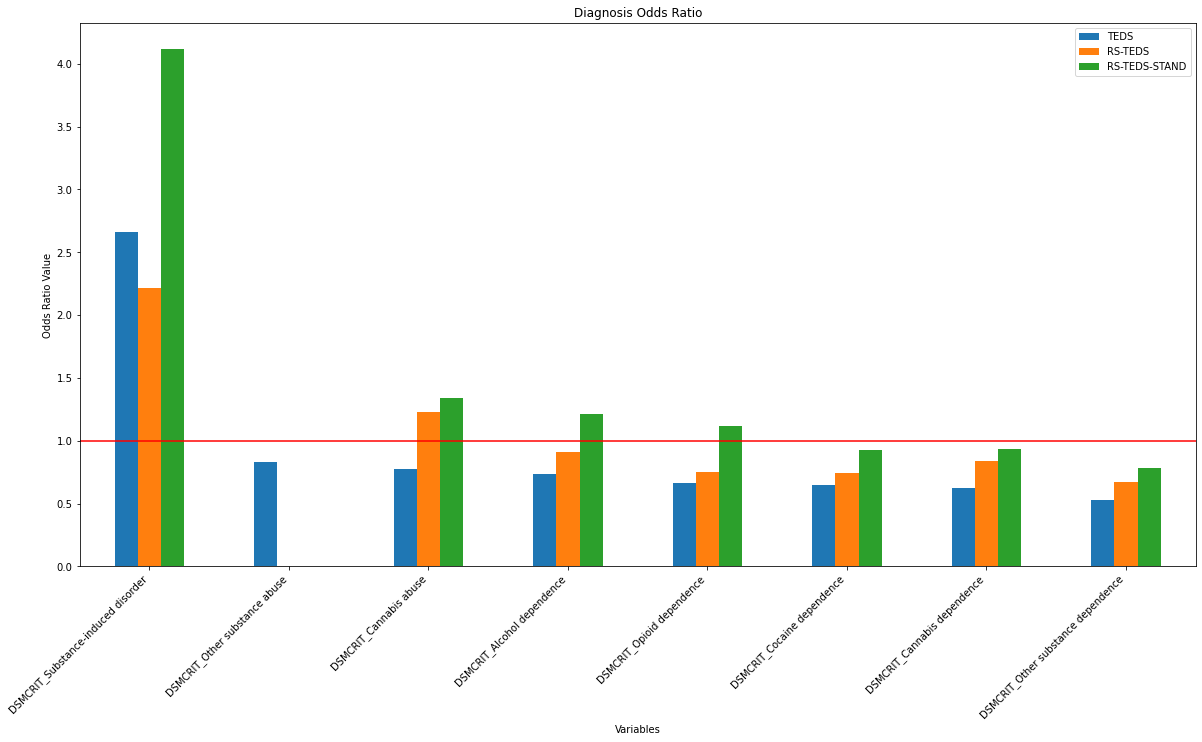

In [131]:
ax = no_intoxication.plot(kind='bar',figsize=(20,10),title='Diagnosis Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

### Services

In [132]:
service_coeff = combined[combined.index.str.startswith('SERVICE')]

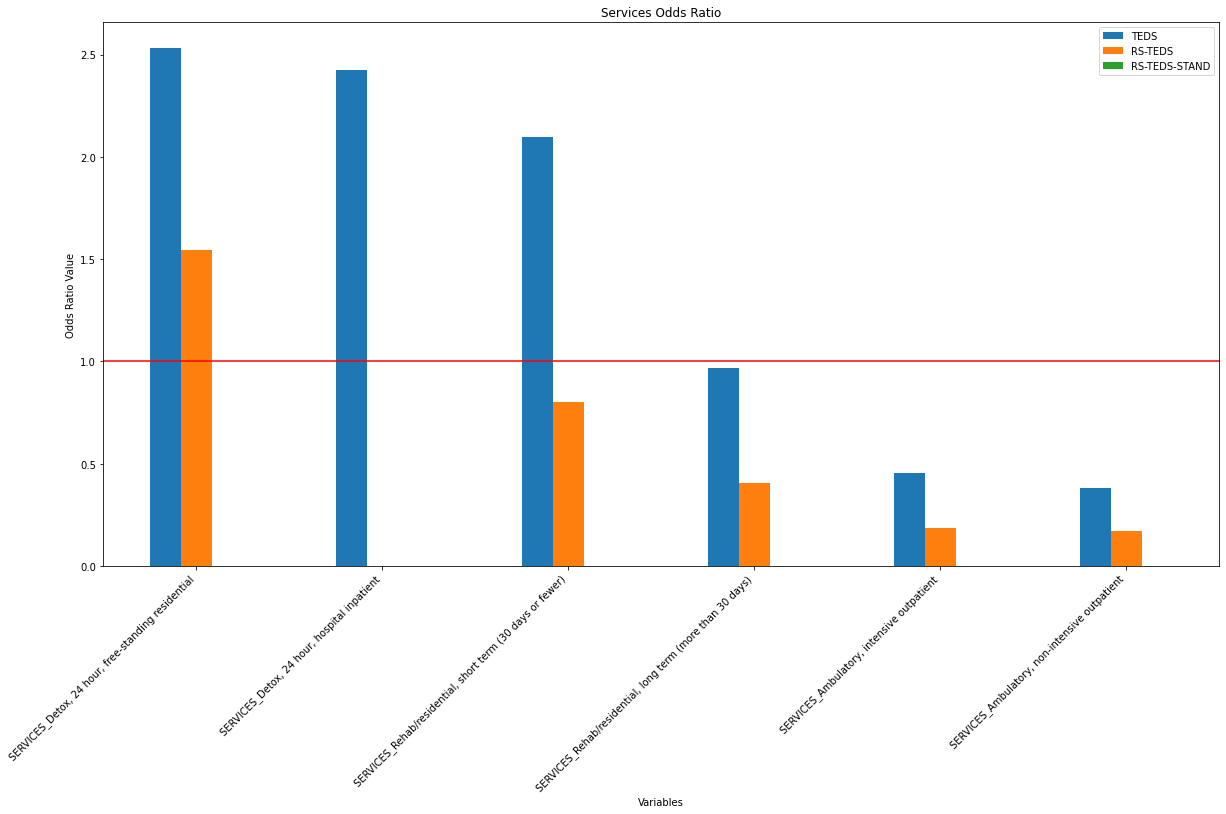

In [133]:
ax = service_coeff.plot(kind='bar',figsize=(20,10),title='Services Odds Ratio')
plt.axhline(y=1, color='r', linestyle='-')
ax.set_xlabel("Variables")
ax.set_ylabel("Odds Ratio Value")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()